# Intronic mapping test - Merging

<div class="alert alert-warning">

**What the fourth section (Merging) does**
    
This section merges the different datasets and visualizes the merged data. The section contains the following important subsections:

* Merging <br>
* Alignment parameter visualization <br>
</div>  

### Loading libraries
Using sc2_seurat environment

In [1]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/bin/python
3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) 
[GCC 9.4.0]
sys.version_info(major=3, minor=9, micro=9, releaselevel='final', serial=0)


In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))#embed HTML within IPython notebook and make containers 90% of screen
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import seaborn as sns
import os
import matplotlib.pyplot as plt

%matplotlib inline
sc.settings.verbosity = 0             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white') #figure resolution and background color

# This is used
# os.path.join('data/'+object_names[i][6:10]+'_preprocessed.h5ad')
#sc.logging.print_versions()

## Load data
The filtered .h5ad  files from preprocessing section.

In [3]:
#set data path
os.chdir('/home/hers_basak/jjiang/jack/outputs/deliverables/0_testing/0_intronic_region_testing/')

In [4]:
os.getcwd()

'/hpc/hers_basak/rnaseq_data/Basaklab/jjiang/outputs/deliverables/0_testing/0_intronic_region_testing'

In [5]:
!ls data/

hey_98_f1_processed_1.h5ad	       merged_reg.h5ad
hey_98_f1_reg_processed_1.h5ad	       zhong_98_f1_processed_1.h5ad
hey_98_filtered_1.h5ad		       zhong_98_f1_reg_processed_1.h5ad
hey_98_intron_f1_processed_1.h5ad      zhong_98_filtered_1.h5ad
hey_98_intron_f1_reg_processed_1.h5ad  zhong_98_intron_f1_processed_1.h5ad
hey_98_intron_filtered_1.h5ad	       zhong_98_intron_f1_reg_processed_1.h5ad
hey_98_intron_preprocessed.h5ad        zhong_98_intron_filtered_1.h5ad
hey_98_preprocessed.h5ad	       zhong_98_intron_preprocessed.h5ad
merged.h5ad			       zhong_98_preprocessed.h5ad


In [6]:
#Hey
hey_98_reg_processed='/hpc/hers_basak/rnaseq_data/Basaklab/jjiang/outputs/deliverables/0_testing/0_intronic_region_testing/data/hey_98_f1_reg_processed_1.h5ad'
hey_98_intron_reg_processed='/hpc/hers_basak/rnaseq_data/Basaklab/jjiang/outputs/deliverables/0_testing/0_intronic_region_testing/data/hey_98_intron_f1_reg_processed_1.h5ad'

#Zhong
zhong_98_reg_processed='/hpc/hers_basak/rnaseq_data/Basaklab/jjiang/outputs/deliverables/0_testing/0_intronic_region_testing/data/zhong_98_f1_reg_processed_1.h5ad'
zhong_98_intron_reg_processed='/hpc/hers_basak/rnaseq_data/Basaklab/jjiang/outputs/deliverables/0_testing/0_intronic_region_testing/data/zhong_98_intron_f1_reg_processed_1.h5ad'


In [7]:
files = [hey_98_reg_processed,hey_98_intron_reg_processed, zhong_98_reg_processed, zhong_98_intron_reg_processed]

In [8]:
names = [name.split('_reg_processed')[0].split('/data/')[1] for name in files ]
print(names)

['hey_98_f1', 'hey_98_intron_f1', 'zhong_98_f1', 'zhong_98_intron_f1']


In [6]:
#Hey
hey_98_processed='/hpc/hers_basak/rnaseq_data/Basaklab/jjiang/outputs/deliverables/0_testing/0_intronic_region_testing/data/hey_98_f1_processed_1.h5ad'
hey_98_intron_processed='/hpc/hers_basak/rnaseq_data/Basaklab/jjiang/outputs/deliverables/0_testing/0_intronic_region_testing/data/hey_98_intron_f1_processed_1.h5ad'

#Zhong
zhong_98_processed='/hpc/hers_basak/rnaseq_data/Basaklab/jjiang/outputs/deliverables/0_testing/0_intronic_region_testing/data/zhong_98_f1_processed_1.h5ad'
zhong_98_intron_processed='/hpc/hers_basak/rnaseq_data/Basaklab/jjiang/outputs/deliverables/0_testing/0_intronic_region_testing/data/zhong_98_intron_f1_processed_1.h5ad'


In [7]:
files = [hey_98_processed,hey_98_intron_processed, zhong_98_processed, zhong_98_intron_processed]

In [8]:
names = [name.split('_processed')[0].split('/data/')[1] for name in files ]
print(names)

['hey_98_f1', 'hey_98_intron_f1', 'zhong_98_f1', 'zhong_98_intron_f1']


In [9]:
object_names_processed=list()
numberobj = len(files)

for i in range(numberobj):
    object_names_processed.append("adata"+"_"+names[i]+"_"+"processed")
    locals()[object_names_processed[i]] = sc.read(files[i]) 
    print(object_names_processed[i],' is loaded')

adata_hey_98_f1_processed  is loaded
adata_hey_98_intron_f1_processed  is loaded
adata_zhong_98_f1_processed  is loaded
adata_zhong_98_intron_f1_processed  is loaded


In [10]:
locals()[object_names_processed[1]]

AnnData object with n_obs × n_vars = 5754 × 21941
    obs: 'species', 'cngb_sample_id', 'sample_group', 'atlas', 'reference', 'intronic_mapping', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'total_counts_mito', 'total_counts_norm'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p', 'neighbors', 'pca', 'scrublet', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [11]:
intron=ad.concat([ adata_hey_98_intron_f1_processed, adata_zhong_98_intron_f1_processed],  join="outer", fill_value=0)
intron.obs_names_make_unique()
exon=ad.concat([adata_hey_98_f1_processed,adata_zhong_98_f1_processed],  join="outer", fill_value=0)
exon.obs_names_make_unique()

In [12]:
cells_intron = set(intron.obs_names)
cells_exon = set(exon.obs_names)
intersecting_cells = cells_intron.intersection(cells_exon)

genes_intron = set(intron.var_names)
genes_exon = set(exon.var_names)
intersecting_genes = genes_intron.intersection(genes_exon)

# Filter both AnnData objects to retain only intersecting cells
filtered_intron = intron[intron.obs_names.isin(intersecting_cells)].copy()
filtered_exon = exon[exon.obs_names.isin(intersecting_cells)].copy()

# Filter both AnnData objects to retain only intersecting genes
filtered_intron = filtered_intron[:, filtered_intron.var_names.isin(intersecting_genes)].copy()
filtered_exon = filtered_exon[:, filtered_exon.var_names.isin(intersecting_genes)].copy()


In [13]:
filtered_exon

AnnData object with n_obs × n_vars = 8069 × 19068
    obs: 'species', 'cngb_sample_id', 'sample_group', 'atlas', 'reference', 'intronic_mapping', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'total_counts_mito', 'total_counts_norm'
    obsm: 'X_pca', 'X_umap'

In [14]:
from scipy.stats import spearmanr
import numpy as np

# Assuming adata_1 and adata_2 are your AnnData objects

# Extract expression matrices from the AnnData objects
expression_intron = filtered_intron.X.toarray()  # Assuming X contains the expression matrix of adata_1
expression_exon = filtered_exon.X.toarray()  # Assuming X contains the expression matrix of adata_2

from scipy.spatial.distance import euclidean
distances = []
for i in range(len(expression_intron)):
    dist = euclidean(expression_intron[i], expression_exon[i])
    distances.append(dist)

average_distance = np.mean(distances)
print(f"Average pairwise distance between common observations: {average_distance}")

median_distance = np.median(distances)
print(f"Median pairwise distance between common observations: {median_distance}")


Average pairwise distance between common observations: 33.25057114017159
Median pairwise distance between common observations: 32.821876525878906


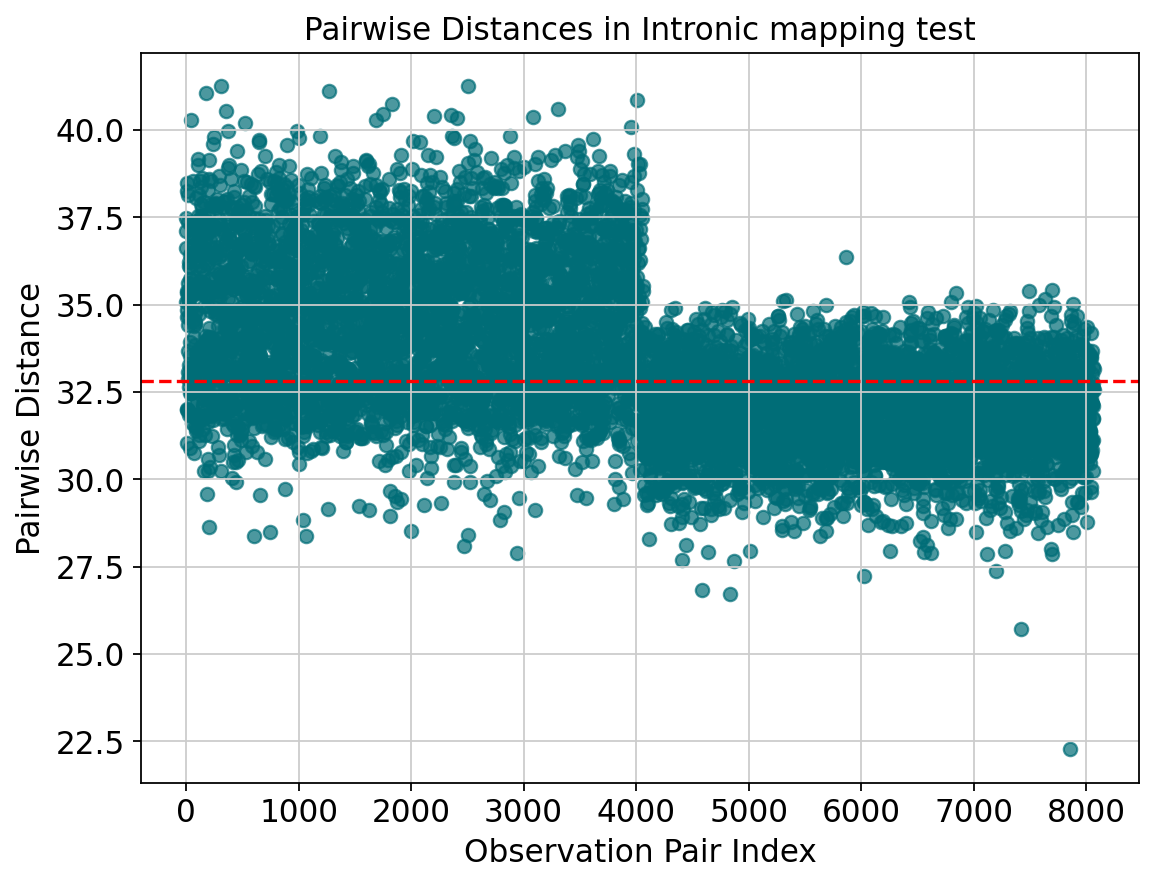

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(distances)), distances, color='#006d77', alpha=0.7)
plt.axhline(median_distance, color='red', linestyle='--', label='Median')
plt.xlabel('Observation Pair Index')
plt.ylabel('Pairwise Distance')
plt.title('Pairwise Distances in Intronic mapping test')
plt.savefig('/home/hers_basak/jjiang/jack/outputs/deliverables/6_analysis/intronic_distance.png')
plt.show()

In [41]:
distances = []
for i in range(len(expression_intron)):
    dist = euclidean(expression_intron[i], expression_intron[i])
    distances.append(dist)

average_distance = np.mean(distances)
print(f"Average pairwise distance between common observations: {average_distance}")

Average pairwise distance between common observations: 0.0


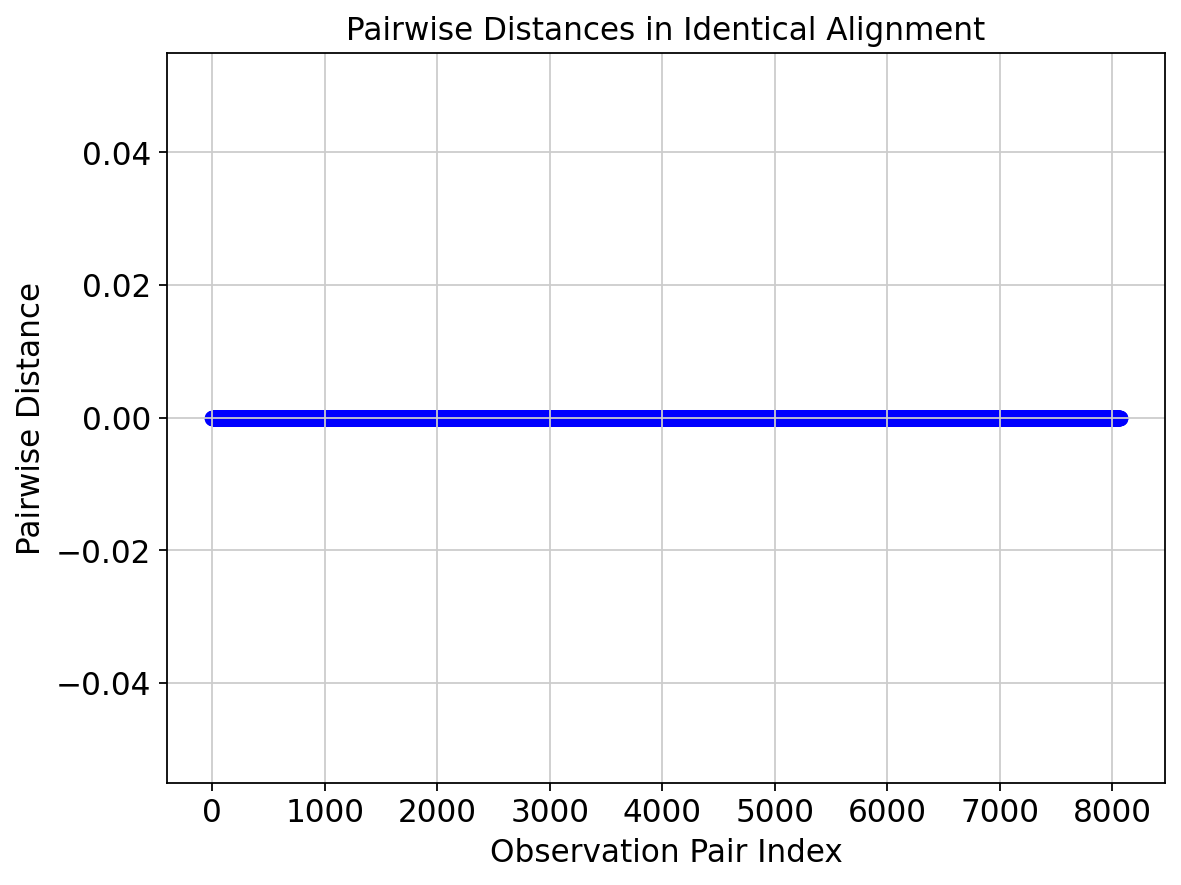

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(distances)), distances, color='blue', alpha=0.7)
plt.xlabel('Observation Pair Index')
plt.ylabel('Pairwise Distance')
plt.title('Pairwise Distances in Identical Alignment')
plt.savefig('/home/hers_basak/jjiang/jack/outputs/deliverables/6_analysis/identical_distance.png')
plt.show()

## Merging

## Hey only

In [19]:
adata_merge_hey = ad.concat([adata_hey_98_f1_processed,
adata_hey_98_intron_f1_processed ],  join="outer", fill_value=0)
adata_merge_hey.obs_names_make_unique()

adata_merge_hey.obs['intronic_mapping'] = adata_merge_hey.obs['intronic_mapping'].astype(str)

sc.tl.pca(adata_merge_hey, svd_solver='arpack')

nn= 15 #default 15
sc.pp.neighbors(adata_merge_hey, n_neighbors=nn, n_pcs=40) # causes well mix between reference genomes
sc.tl.umap(adata_merge_hey)


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


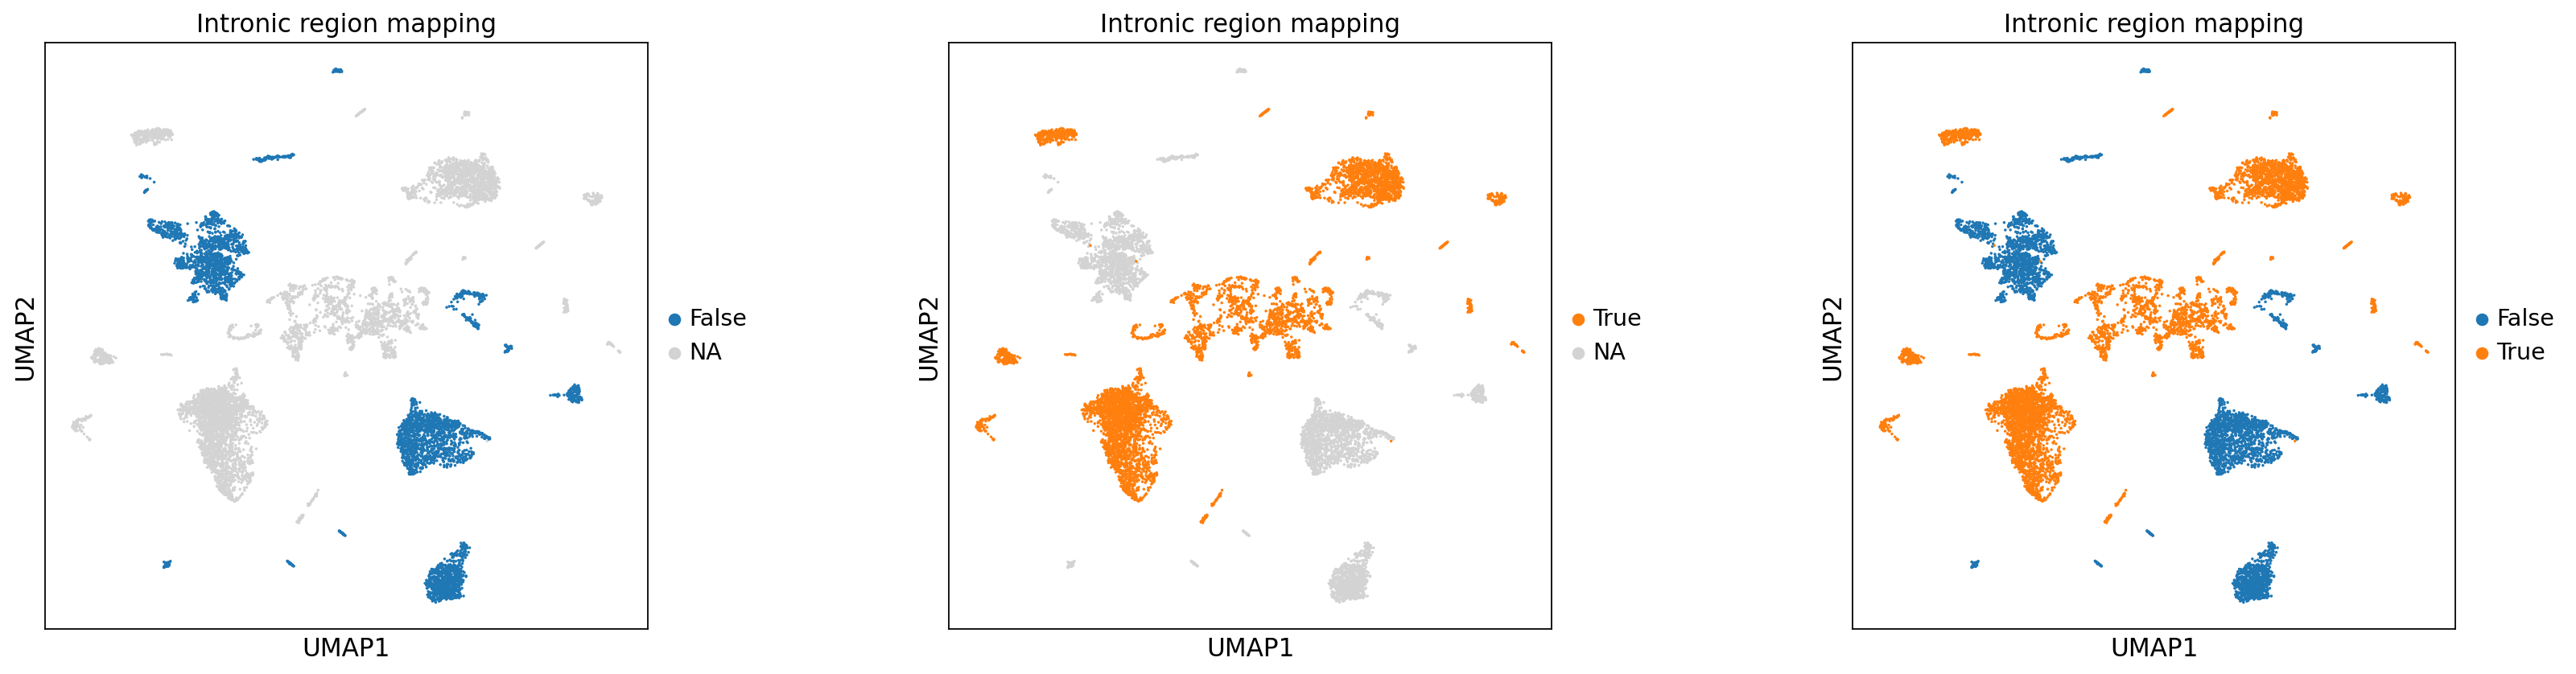

In [20]:
fig, axs = plt.subplots(1, 3, figsize = [24,6])
#axs[-1, -1].axis('off')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
sc.pl.umap(adata_merge_hey, color='intronic_mapping', groups= 'False', use_raw=False, s=10, ax= axs[0],show=False, title='Intronic region mapping')
sc.pl.umap(adata_merge_hey, color='intronic_mapping', groups= 'True', use_raw=False, s=10, ax= axs[1],show=False, title='Intronic region mapping')
sc.pl.umap(adata_merge_hey, color='intronic_mapping', use_raw=False, s=10, ax= axs[2],show=False, title='Intronic region mapping')
fig.savefig('figures/merge/merge_hey_subplots.png',bbox_inches='tight')

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


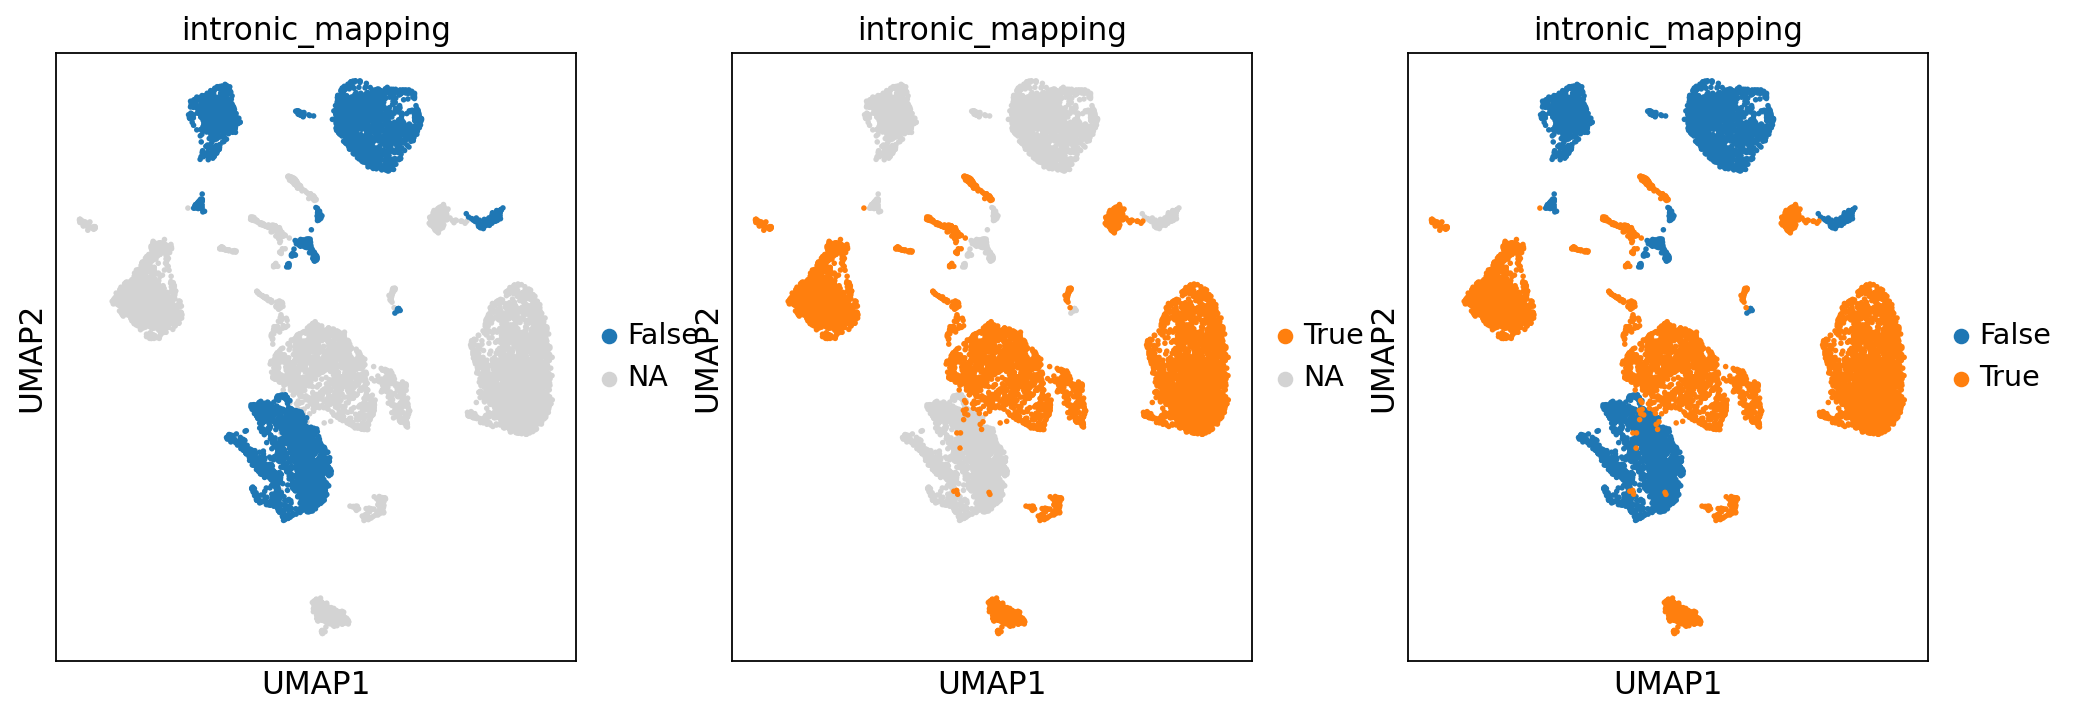

In [67]:
adata_merge_hey = ad.concat([adata_hey_98_f1_reg_processed,
adata_hey_98_intron_f1_reg_processed ],  join="outer", fill_value=0)
adata_merge_hey.obs_names_make_unique()

adata_merge_hey.obs['intronic_mapping'] = adata_merge_hey.obs['intronic_mapping'].astype(str)

sc.tl.pca(adata_merge_hey, svd_solver='arpack')

nn= 15 #default 15
sc.pp.neighbors(adata_merge_hey, n_neighbors=nn, n_pcs=40) # causes well mix between reference genomes
sc.tl.umap(adata_merge_hey)


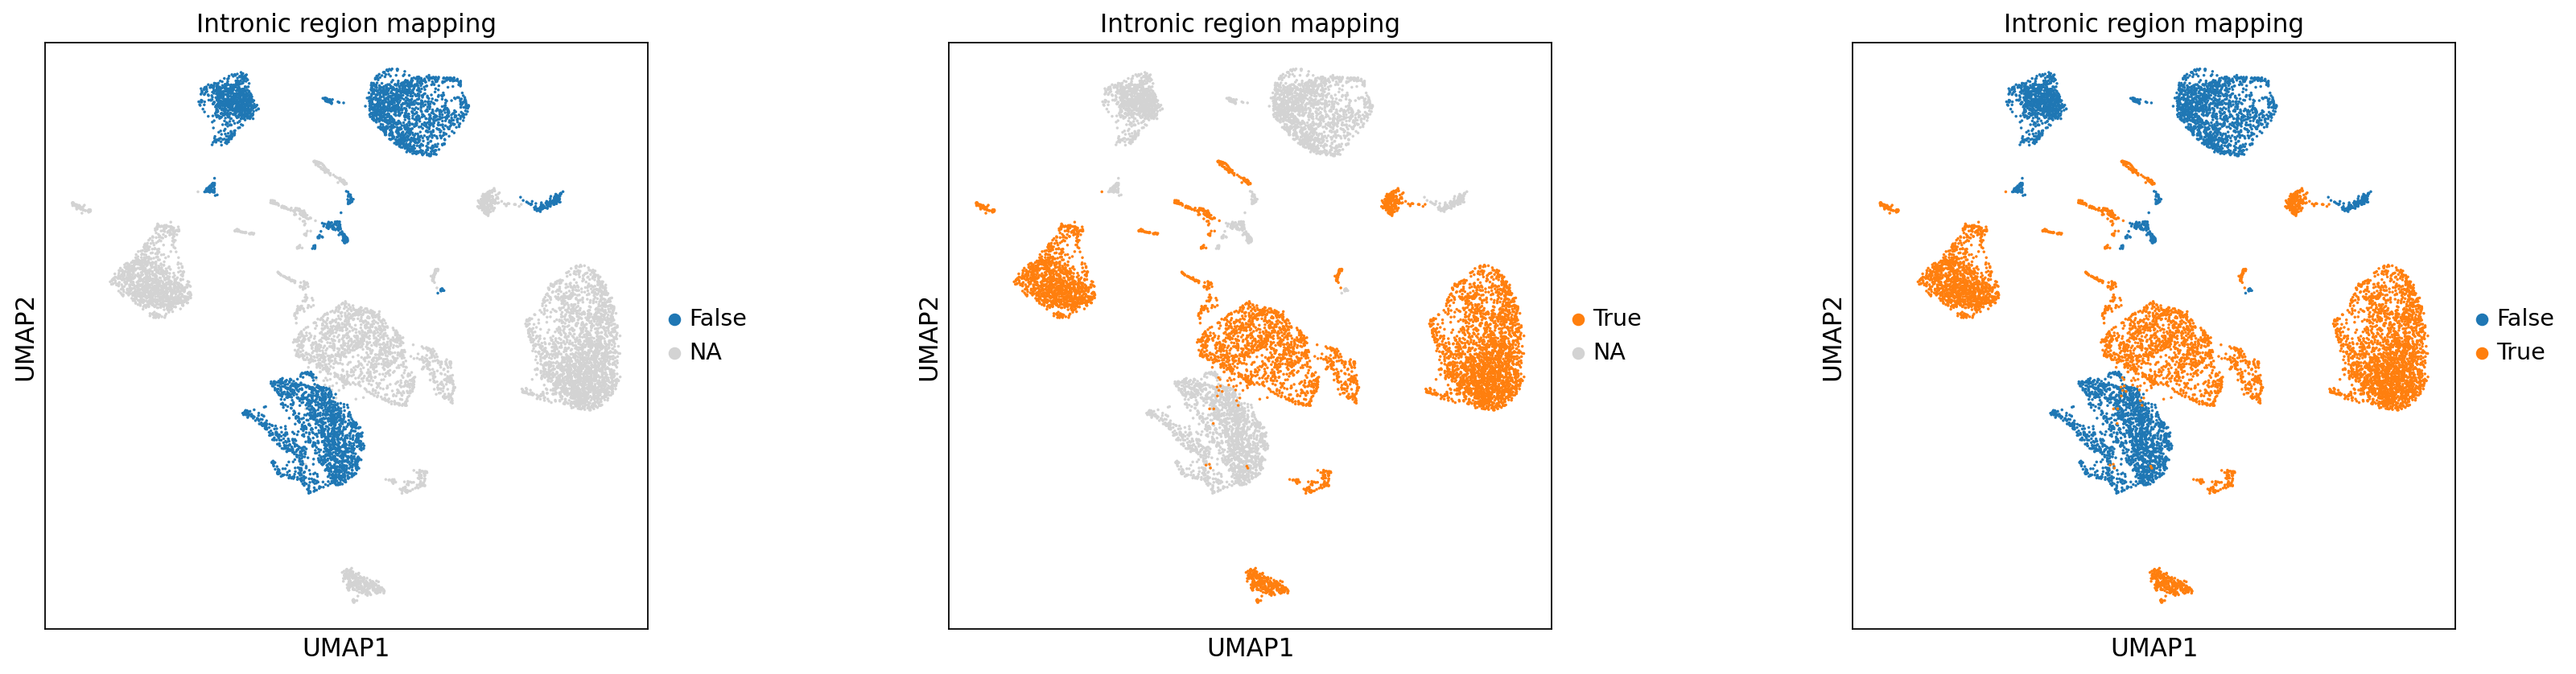

In [141]:
fig, axs = plt.subplots(1, 3, figsize = [24,6])
#axs[-1, -1].axis('off')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
sc.pl.umap(adata_merge_hey, color='intronic_mapping', groups= 'False', use_raw=False, s=10, ax= axs[0],show=False, title='Intronic region mapping')
sc.pl.umap(adata_merge_hey, color='intronic_mapping', groups= 'True', use_raw=False, s=10, ax= axs[1],show=False, title='Intronic region mapping')
sc.pl.umap(adata_merge_hey, color='intronic_mapping', use_raw=False, s=10, ax= axs[2],show=False, title='Intronic region mapping')
fig.savefig('figures/merge/merge_hey_subplots.png',bbox_inches='tight')

## Zhong only

In [21]:
adata_merge_zhong = ad.concat([adata_zhong_98_f1_processed,
adata_zhong_98_intron_f1_processed ],  join="outer", fill_value=0)
adata_merge_zhong.obs_names_make_unique()

adata_merge_zhong.obs['intronic_mapping'] = adata_merge_zhong.obs['intronic_mapping'].astype(str)

sc.tl.pca(adata_merge_zhong, svd_solver='arpack')

nn= 15 #default 15
sc.pp.neighbors(adata_merge_zhong, n_neighbors=nn, n_pcs=40) # causes well mix between reference genomes
sc.tl.umap(adata_merge_zhong)



/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


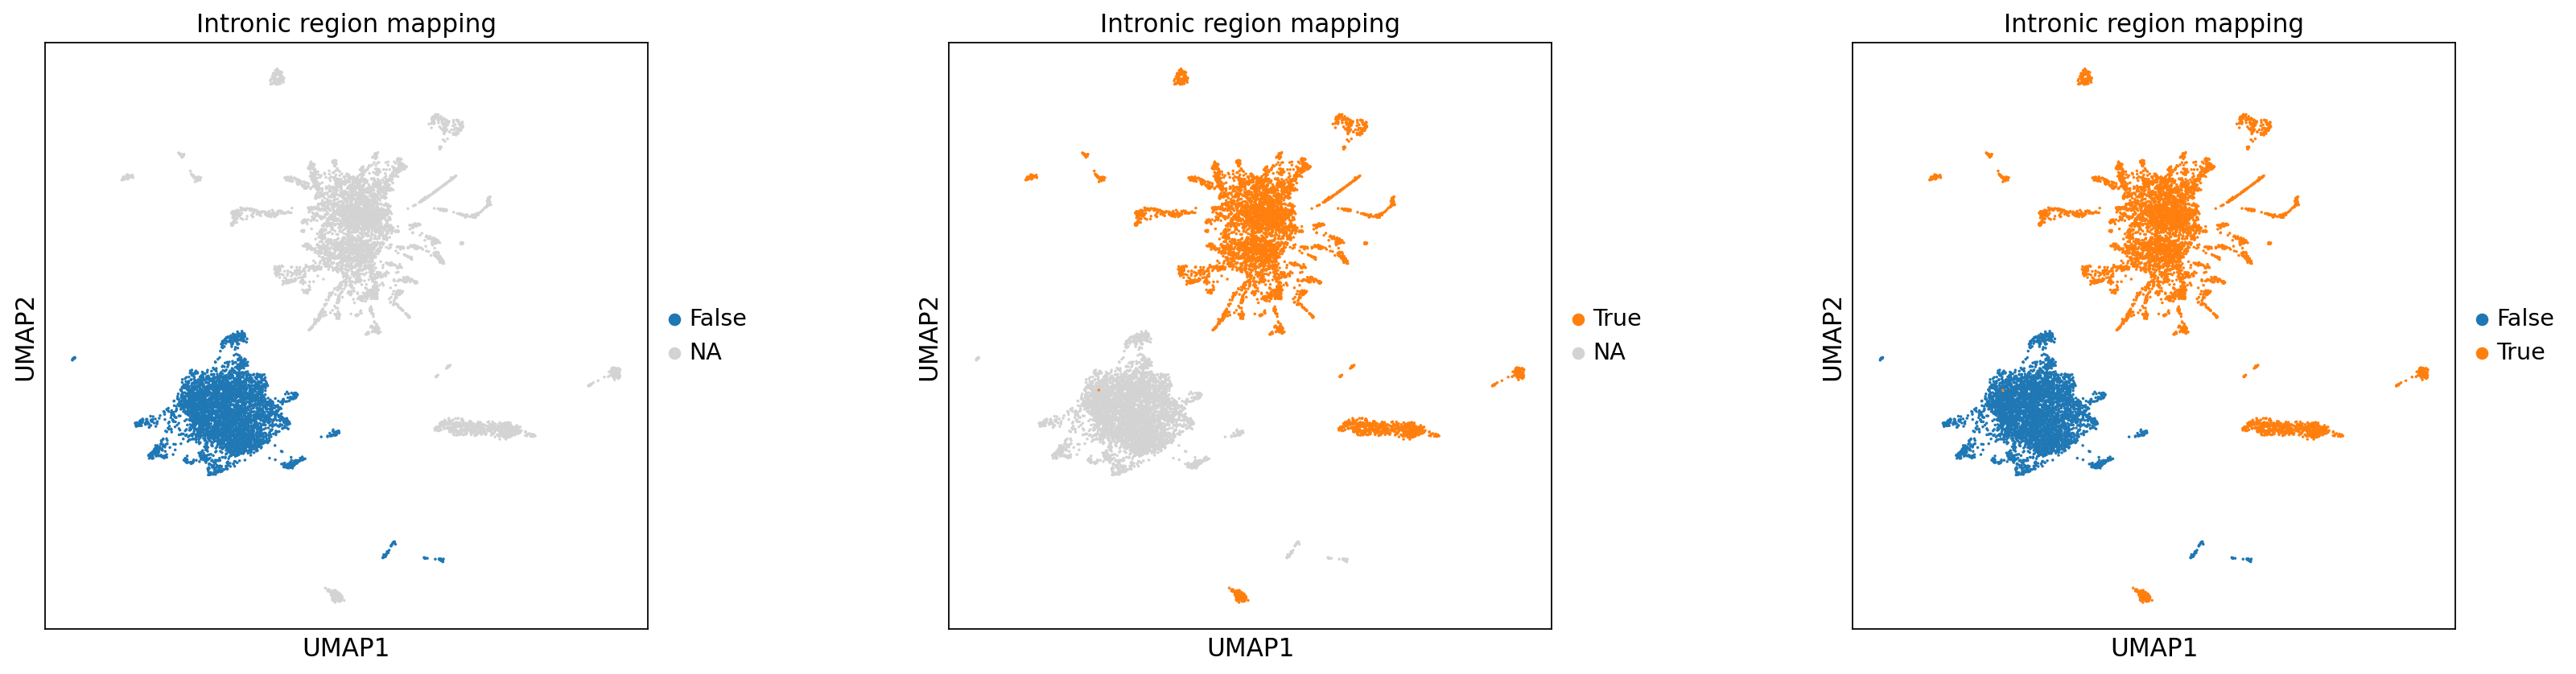

In [22]:
fig, axs = plt.subplots(1, 3, figsize = [24,6])
#axs[-1, -1].axis('off')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
sc.pl.umap(adata_merge_zhong, color='intronic_mapping', groups= 'False', use_raw=False, s=10, ax= axs[0],show=False, title='Intronic region mapping')
sc.pl.umap(adata_merge_zhong, color='intronic_mapping', groups= 'True', use_raw=False, s=10, ax= axs[1],show=False, title='Intronic region mapping')
sc.pl.umap(adata_merge_zhong, color='intronic_mapping', use_raw=False, s=10, ax= axs[2],show=False, title='Intronic region mapping')
fig.savefig('figures/merge/merge_zhong_subplots.png',bbox_inches='tight')

In [89]:
adata_merge_zhong = ad.concat([adata_zhong_98_f1_reg_processed,
adata_zhong_98_intron_f1_reg_processed ],  join="outer", fill_value=0)
adata_merge_zhong.obs_names_make_unique()

adata_merge_zhong.obs['intronic_mapping'] = adata_merge_zhong.obs['intronic_mapping'].astype(str)

sc.tl.pca(adata_merge_zhong, svd_solver='arpack')

nn= 15 #default 15
sc.pp.neighbors(adata_merge_zhong, n_neighbors=nn, n_pcs=40) # causes well mix between reference genomes
sc.tl.umap(adata_merge_zhong)



/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


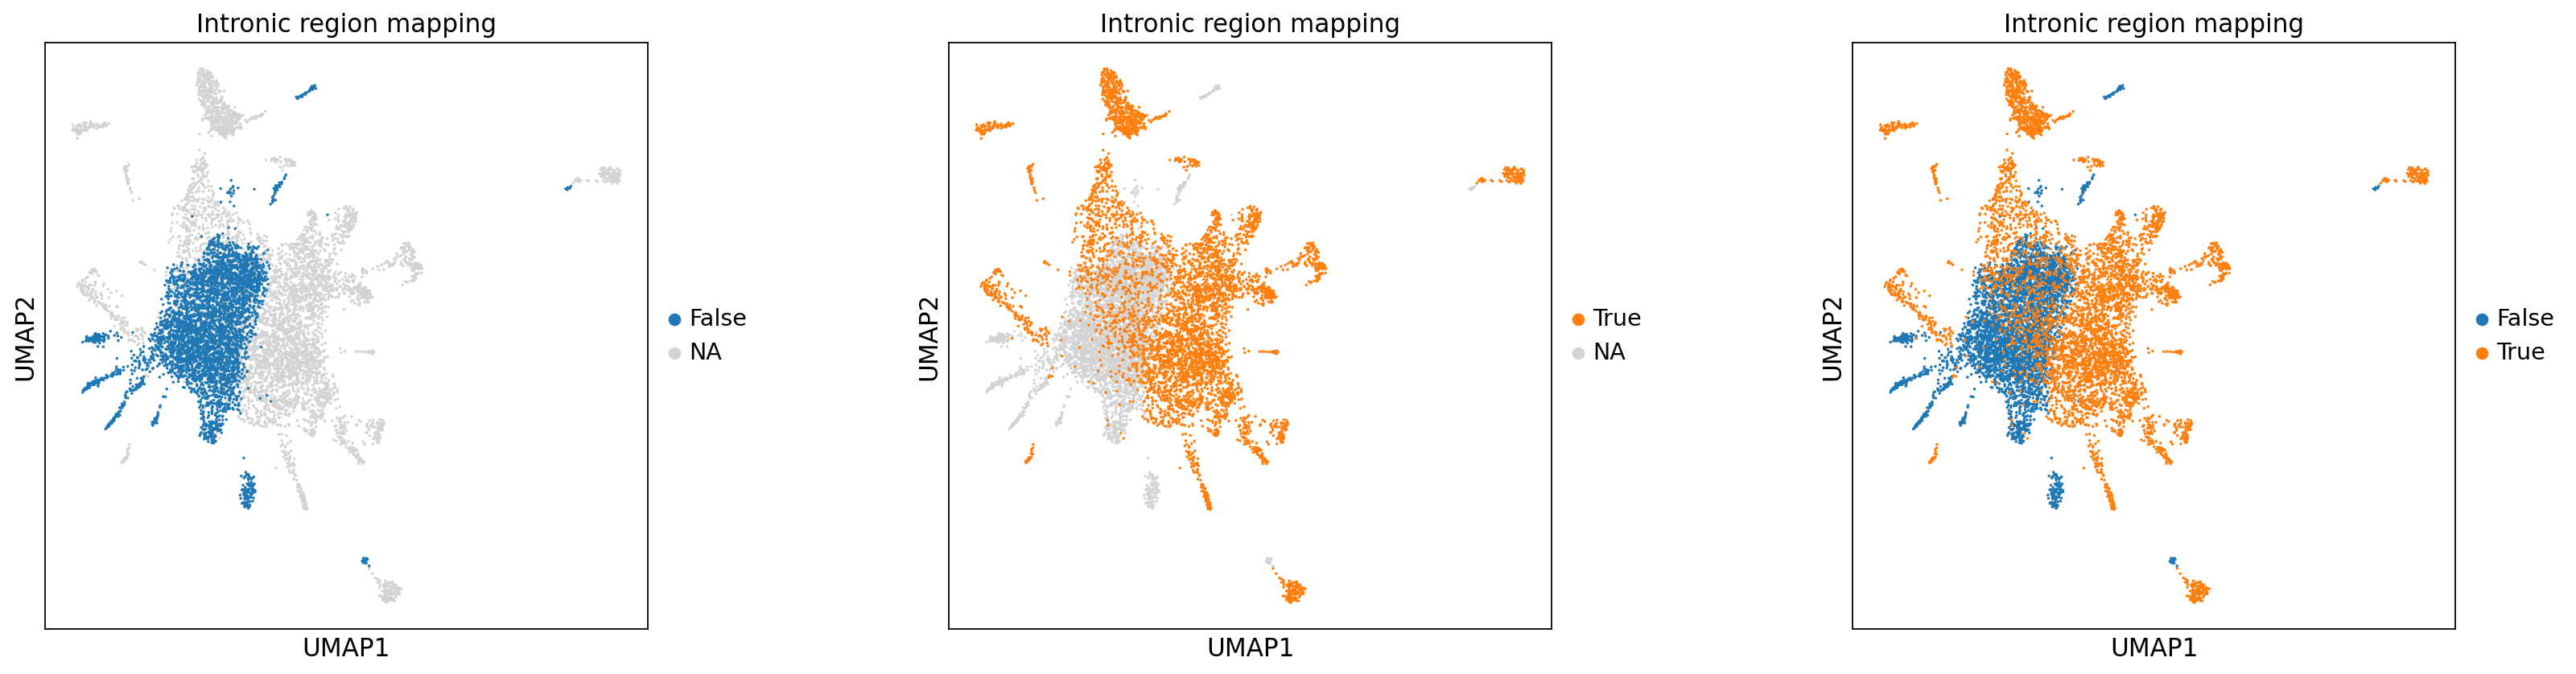

In [131]:
fig, axs = plt.subplots(1, 3, figsize = [24,6])
#axs[-1, -1].axis('off')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
sc.pl.umap(adata_merge_zhong, color='intronic_mapping', groups= 'False', use_raw=False, s=10, ax= axs[0],show=False, title='Intronic region mapping')
sc.pl.umap(adata_merge_zhong, color='intronic_mapping', groups= 'True', use_raw=False, s=10, ax= axs[1],show=False, title='Intronic region mapping')
sc.pl.umap(adata_merge_zhong, color='intronic_mapping', use_raw=False, s=10, ax= axs[2],show=False, title='Intronic region mapping')
fig.savefig('figures/merge/merge_zhong_subplots.png',bbox_inches='tight')

## Both merge

In [13]:
adata_merge = ad.concat([adata_hey_98_f1_processed, adata_hey_98_intron_f1_processed ,adata_zhong_98_f1_processed, adata_zhong_98_intron_f1_processed],  join="outer", fill_value=0)
adata_merge.obs_names_make_unique()

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [14]:
adata_merge.obs['intronic_mapping'] = adata_merge.obs['intronic_mapping'].astype(str)

pca again

In [15]:
sc.tl.pca(adata_merge, svd_solver='arpack')
#    sc.tl.pca(locals()[object_names_reg[i]], svd_solver='arpack')

In [49]:
adata_merge.write('/home/hers_basak/jjiang/jack/outputs/deliverables/0_testing/0_intronic_region_testing/data/merged_reg.h5ad')

# Quantification of similarity

In [ ]:
adata_merge=sc.read_h5ad('/home/hers_basak/jjiang/jack/outputs/deliverables/0_testing/0_intronic_region_testing/data/merged_reg.h5ad')

In [42]:
print(adata_merge.X)

  (0, 21573)	1.1740942
  (0, 10701)	1.1740942
  (0, 5201)	1.1740942
  (0, 14198)	1.1740942
  (0, 11668)	1.1740942
  (0, 3938)	1.1740942
  (0, 5160)	1.1740942
  (0, 22146)	1.1740942
  (0, 16551)	2.8121986
  (0, 12245)	1.1740942
  (0, 3147)	1.1740942
  (0, 1005)	2.0419517
  (0, 2058)	1.1740942
  (0, 12579)	1.1740942
  (0, 2653)	1.1740942
  (0, 19641)	1.1740942
  (0, 6661)	2.0419517
  (0, 21543)	1.1740942
  (0, 17560)	2.296652
  (0, 16877)	1.1740942
  (0, 19912)	1.1740942
  (0, 16902)	1.1740942
  (0, 13737)	1.1740942
  (0, 19129)	1.1740942
  (0, 14920)	1.1740942
  :	:
  (19259, 12368)	0.7952336
  (19259, 12075)	1.232536
  (19259, 7188)	0.7952336
  (19259, 20463)	0.7952336
  (19259, 19003)	0.7952336
  (19259, 13504)	0.7952336
  (19259, 21084)	1.232536
  (19259, 14165)	0.7952336
  (19259, 12897)	0.7952336
  (19259, 5588)	1.232536
  (19259, 3004)	1.232536
  (19259, 1790)	2.4794438
  (19259, 13469)	0.7952336
  (19259, 4485)	1.232536
  (19259, 17789)	1.5357645
  (19259, 13007)	1.5357645
  (192

We do this after PCA calculation so the feature amount is the same. This will ofcourse be somewhat biased as we only took hvg. Dont use my function, it is so slow...

In [14]:
"""import math
#Takes two h5ad objects and returns a list of euclidean distances of each cell in the first matrix with its corresponding index in the second matrix
def pairwise_euclidean_distance(matrix1, matrix2,integrated):
     
    num_matrix1=len(matrix1)
    num_matrix2=len(matrix2)
    
    distances=[]
    
    
    if integrated==True:
        matrix1_pca=matrix1.obsm['X_pca_harmony']
        matrix2_pca=matrix2.obsm['X_pca_harmony']
    else:
        matrix1_pca=matrix1.obsm['X_pca']
        matrix2_pca=matrix2.obsm['X_pca']
        
    for i in range(num_matrix1):
        row=[]
        for j in range(num_matrix2):
            d_squared = np.sum(np.square(matrix1_pca[i]- matrix2_pca[j]))
            #d=math.sqrt(d_squared)
            row.append(d_squared)
        print(f'Progress: {i}/{num_matrix1}')
        distances.append(row)
        
    return distances
        """

"import math\n#Takes two h5ad objects and returns a list of euclidean distances of each cell in the first matrix with its corresponding index in the second matrix\ndef pairwise_euclidean_distance(matrix1, matrix2,integrated):\n     \n    num_matrix1=len(matrix1)\n    num_matrix2=len(matrix2)\n    \n    distances=[]\n    \n    \n    if integrated==True:\n        matrix1_pca=matrix1.obsm['X_pca_harmony']\n        matrix2_pca=matrix2.obsm['X_pca_harmony']\n    else:\n        matrix1_pca=matrix1.obsm['X_pca']\n        matrix2_pca=matrix2.obsm['X_pca']\n        \n    for i in range(num_matrix1):\n        row=[]\n        for j in range(num_matrix2):\n            d_squared = np.sum(np.square(matrix1_pca[i]- matrix2_pca[j]))\n            #d=math.sqrt(d_squared)\n            row.append(d_squared)\n        print(f'Progress: {i}/{num_matrix1}')\n        distances.append(row)\n        \n    return distances\n        "

In [59]:
subset_intron[subset_intron.obs['atlas']=='zhong']

View of AnnData object with n_obs × n_vars = 5194 × 22698
    obs: 'species', 'cngb_sample_id', 'sample_group', 'atlas', 'reference', 'intronic_mapping', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'total_counts_mito', 'total_counts_norm'
    uns: 'pca'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [72]:
def distance_heatmap(adata,color,group,values,subgroup_sizes,xlabel,ylabel,title,ticklabels,save):
    from scipy.spatial import distance_matrix
    subset=adata[adata.obs[group]==values[0]]
    subset_intron=adata[adata.obs[group]==values[1]]

    matrix1_pca=np.concatenate((subset.obsm['X_pca'],subset_intron.obsm['X_pca']), axis=0)
    #matrix2_pca=subset.obsm['X_pca']+subset_intron.obsm['X_pca']
    correlation_base= distance_matrix(matrix1_pca, matrix1_pca)

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_base,cmap=color)

    # Add group labels as y-axis tick labels
    ticks=[]
    j=0
    for i in subgroup_sizes:
        j+=i/2
        ticks.append(j)
        j+=i/2
        
    plt.xticks(ticks=ticks,
               labels=ticklabels)

    # Add group labels as y-axis tick labels
    plt.yticks(ticks=ticks,
               labels=ticklabels)

    # Set labels for axes
    #plt.xlabel(xlabel)
    #plt.ylabel(ylabel)
    plt.title(title)

    plt.show()
    plt.savefig(save)

In [ ]:
distance_heatmap(adata=adata_merge,color='Blues',group='intronic_mapping',values=['False','True'],
                 subgroup_sizes=[4129,4183,5754,5194],
                 xlabel='Include intronic mapping',ylabel='Exonic mapping',title='Correlation Heatmap',ticklabels=['Hey', 'Zhong','Hey_intron', 'Zhong_intron'],
                 save='/home/hers_basak/jjiang/jack/outputs/deliverables/0_testing/heatmaps/heatmap_intronic_mapping.png')

In [158]:
ax

{'heatmap_ax': <AxesSubplot:>,
 'groupby_ax': <AxesSubplot:xlabel='Default', ylabel='atlas'>,
 'gene_groups_ax': <AxesSubplot:xlabel='Intronic mapping'>}

In [38]:
nn= 15 #default 15
sc.pp.neighbors(adata_merge, n_neighbors=nn, n_pcs=40)
sc.tl.umap(adata_merge)

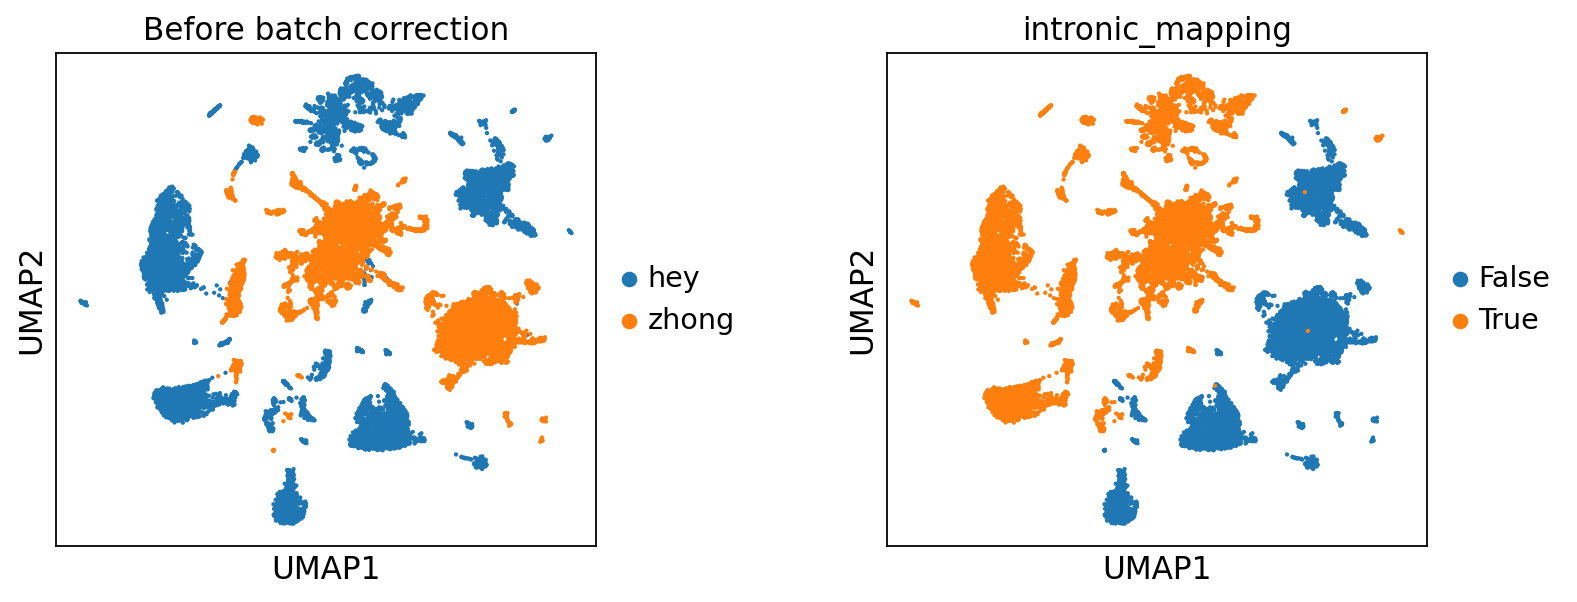

In [27]:
sc.pl.umap(adata_merge,color=[ 'atlas', 'intronic_mapping'], wspace=0.4,s=15, title='Before batch correction')

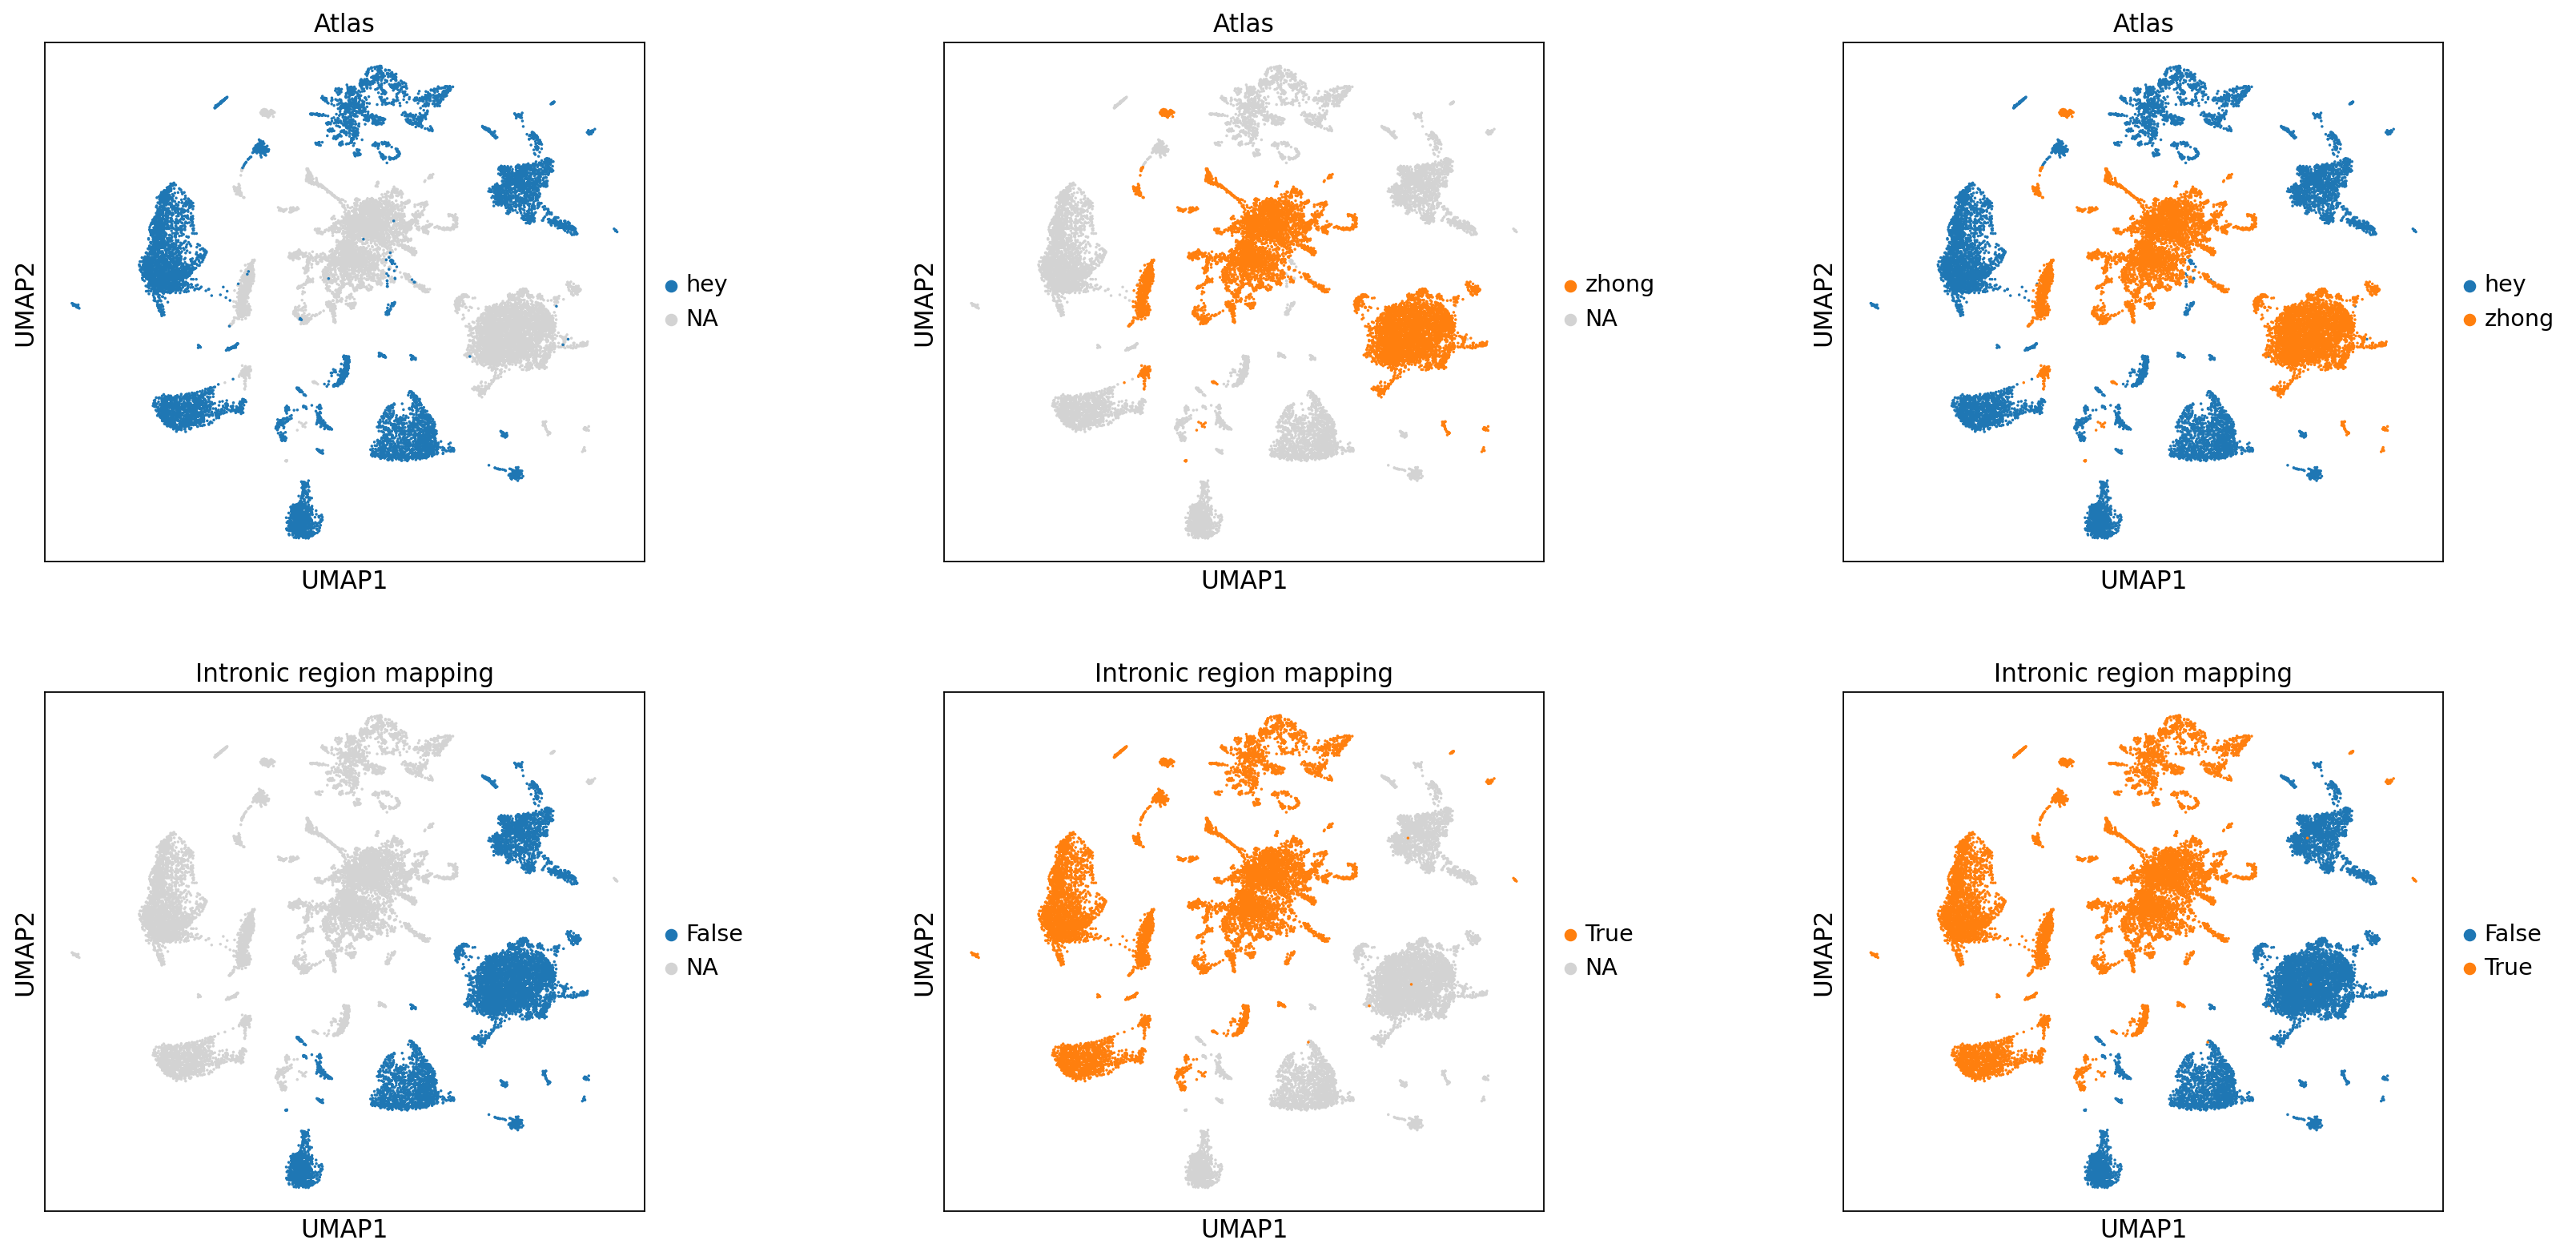

In [28]:
fig, axs = plt.subplots(2, 3, figsize = [24,12])
#axs[-1, -1].axis('off')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.25)
sc.pl.umap(adata_merge, color='atlas', groups= 'hey', use_raw=False, s=10, ax= axs[0,0],show=False, title='Atlas')
sc.pl.umap(adata_merge, color='atlas', groups= 'zhong', use_raw=False, s=10, ax= axs[0,1],show=False, title='Atlas')
sc.pl.umap(adata_merge, color='atlas', use_raw=False, s=10, ax= axs[0,2],show=False, title='Atlas')
sc.pl.umap(adata_merge, color='intronic_mapping', groups= 'False', use_raw=False, s=10, ax= axs[1,0],show=False, title='Intronic region mapping')
sc.pl.umap(adata_merge, color='intronic_mapping', groups= 'True', use_raw=False, s=10, ax= axs[1,1],show=False, title='Intronic region mapping')
sc.pl.umap(adata_merge, color='intronic_mapping', use_raw=False, s=10, ax= axs[1,2],show=False, title='Intronic region mapping')
fig.savefig('figures/merge/merge_subplots.png',bbox_inches='tight')

In [29]:
adata_merge

AnnData object with n_obs × n_vars = 19260 × 22698
    obs: 'species', 'cngb_sample_id', 'sample_group', 'atlas', 'reference', 'intronic_mapping', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'total_counts_mito', 'total_counts_norm'
    uns: 'pca', 'neighbors', 'umap', 'atlas_colors', 'intronic_mapping_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

KeyError: 'Could not find key Rbfox3 in .var_names or .obs.columns.'

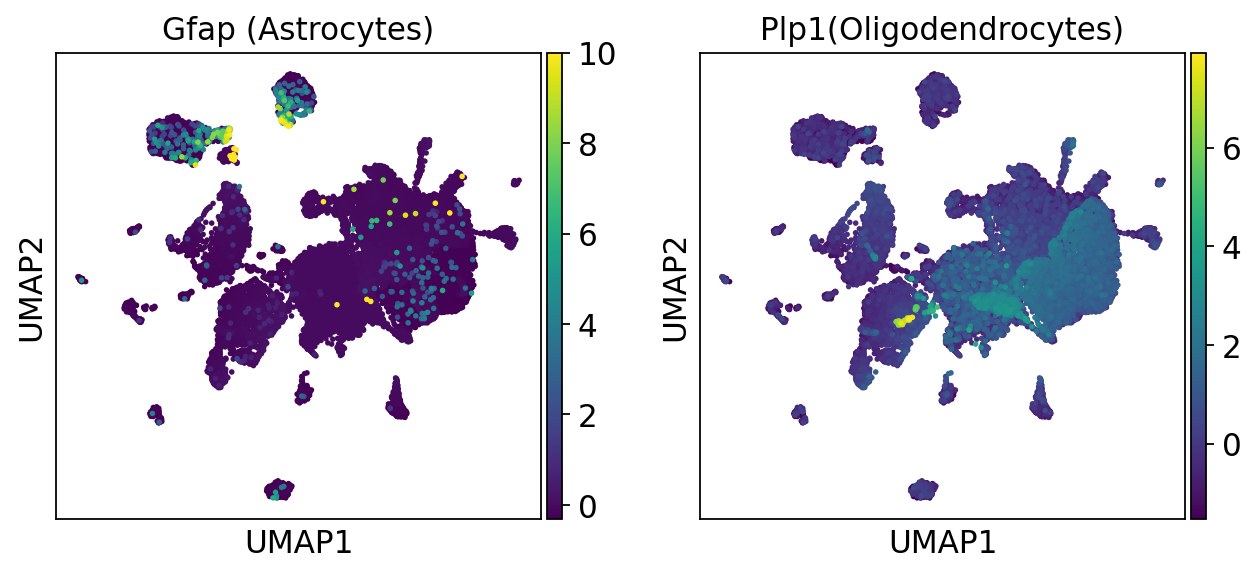

In [50]:
sc.settings.figdir = '/home/hers_basak/jjiang/jack/outputs/deliverables/0_testing/markers/'

if adata_merge.obs['species'][0] == 'Homo sapien':
    sc.pl.umap(adata_merge, color=['GFAP', 'PLP1', 'RBFOX3','GAD1','GAD2', 'TH','SLC17A6'], use_raw=True, s=25)
       #,save = "merge_umap_n"+str(nn)+"_2.pdf")
else:
    sc.pl.umap(adata_merge, color=['Gfap', 'Plp1', 'Rbfox3','Gad1','Gad2', 'Slc17a6','Th'],title=['Gfap (Astrocytes)', 'Plp1(Oligodendrocytes)', 'Rbfox3(post-mitotic neurons)', 'Gad1 (GABA-ergic)','Gad2 (GABA-ergic)', 'Slc17a6 (gutamatergic)', 'Th (dopaminergic)'], use_raw=False, s=25
              ,save = "_intronic_region_reg.png")

## Batch Correction

In [12]:
adata_merge_rb = adata_merge.copy()
adata_merge_rb.obs['intronic_mapping'] = adata_merge_rb.obs['intronic_mapping'].astype(str)

In [13]:
sc.external.pp.harmony_integrate(adata_merge_rb, key =['atlas'])

2023-10-06 16:37:50,051 - harmonypy - INFO - Iteration 1 of 10
2023-10-06 16:37:57,663 - harmonypy - INFO - Iteration 2 of 10
2023-10-06 16:38:05,365 - harmonypy - INFO - Iteration 3 of 10
2023-10-06 16:38:12,978 - harmonypy - INFO - Iteration 4 of 10
2023-10-06 16:38:17,181 - harmonypy - INFO - Converged after 4 iterations


In [31]:
adata_merge_rb.obs['intronic_mapping']

AAACCCAGTACGGATG-1      False
AAACCCAGTCGTTATG-1      False
AAACGAAAGCGTCAAG-1      False
AAACGAAAGTAGGAAG-1      False
AAACGAACAGTCAACT-1      False
                        ...  
TTTGTCAGTAGGCTGA-1-1     True
TTTGTCAGTCATACTG-1       True
TTTGTCAGTTTGTGTG-1-1     True
TTTGTCATCACGGTTA-1-1     True
TTTGTCATCTCTGCTG-1-1     True
Name: intronic_mapping, Length: 19260, dtype: category
Categories (2, object): ['False', 'True']

In [35]:
intron_only=adata_merge_rb[adata_merge_rb.obs['intronic_mapping'] =='True']
normal=adata_merge_rb[adata_merge_rb.obs['intronic_mapping'] =='False']

In [36]:
intron_only

View of AnnData object with n_obs × n_vars = 10948 × 22698
    obs: 'species', 'cngb_sample_id', 'sample_group', 'atlas', 'reference', 'intronic_mapping', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'total_counts_mito', 'total_counts_norm'
    uns: 'pca', 'neighbors', 'umap', 'intronic_mapping_colors', 'atlas_colors'
    obsm: 'X_pca', 'X_umap', 'X_pca_harmony'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [ ]:
distance_matrix=pairwise_euclidean_distance(intron_only,normal)

In [ ]:
distance_matrix

In [32]:
sc.tl.pca(adata_merge_rb, svd_solver='arpack')

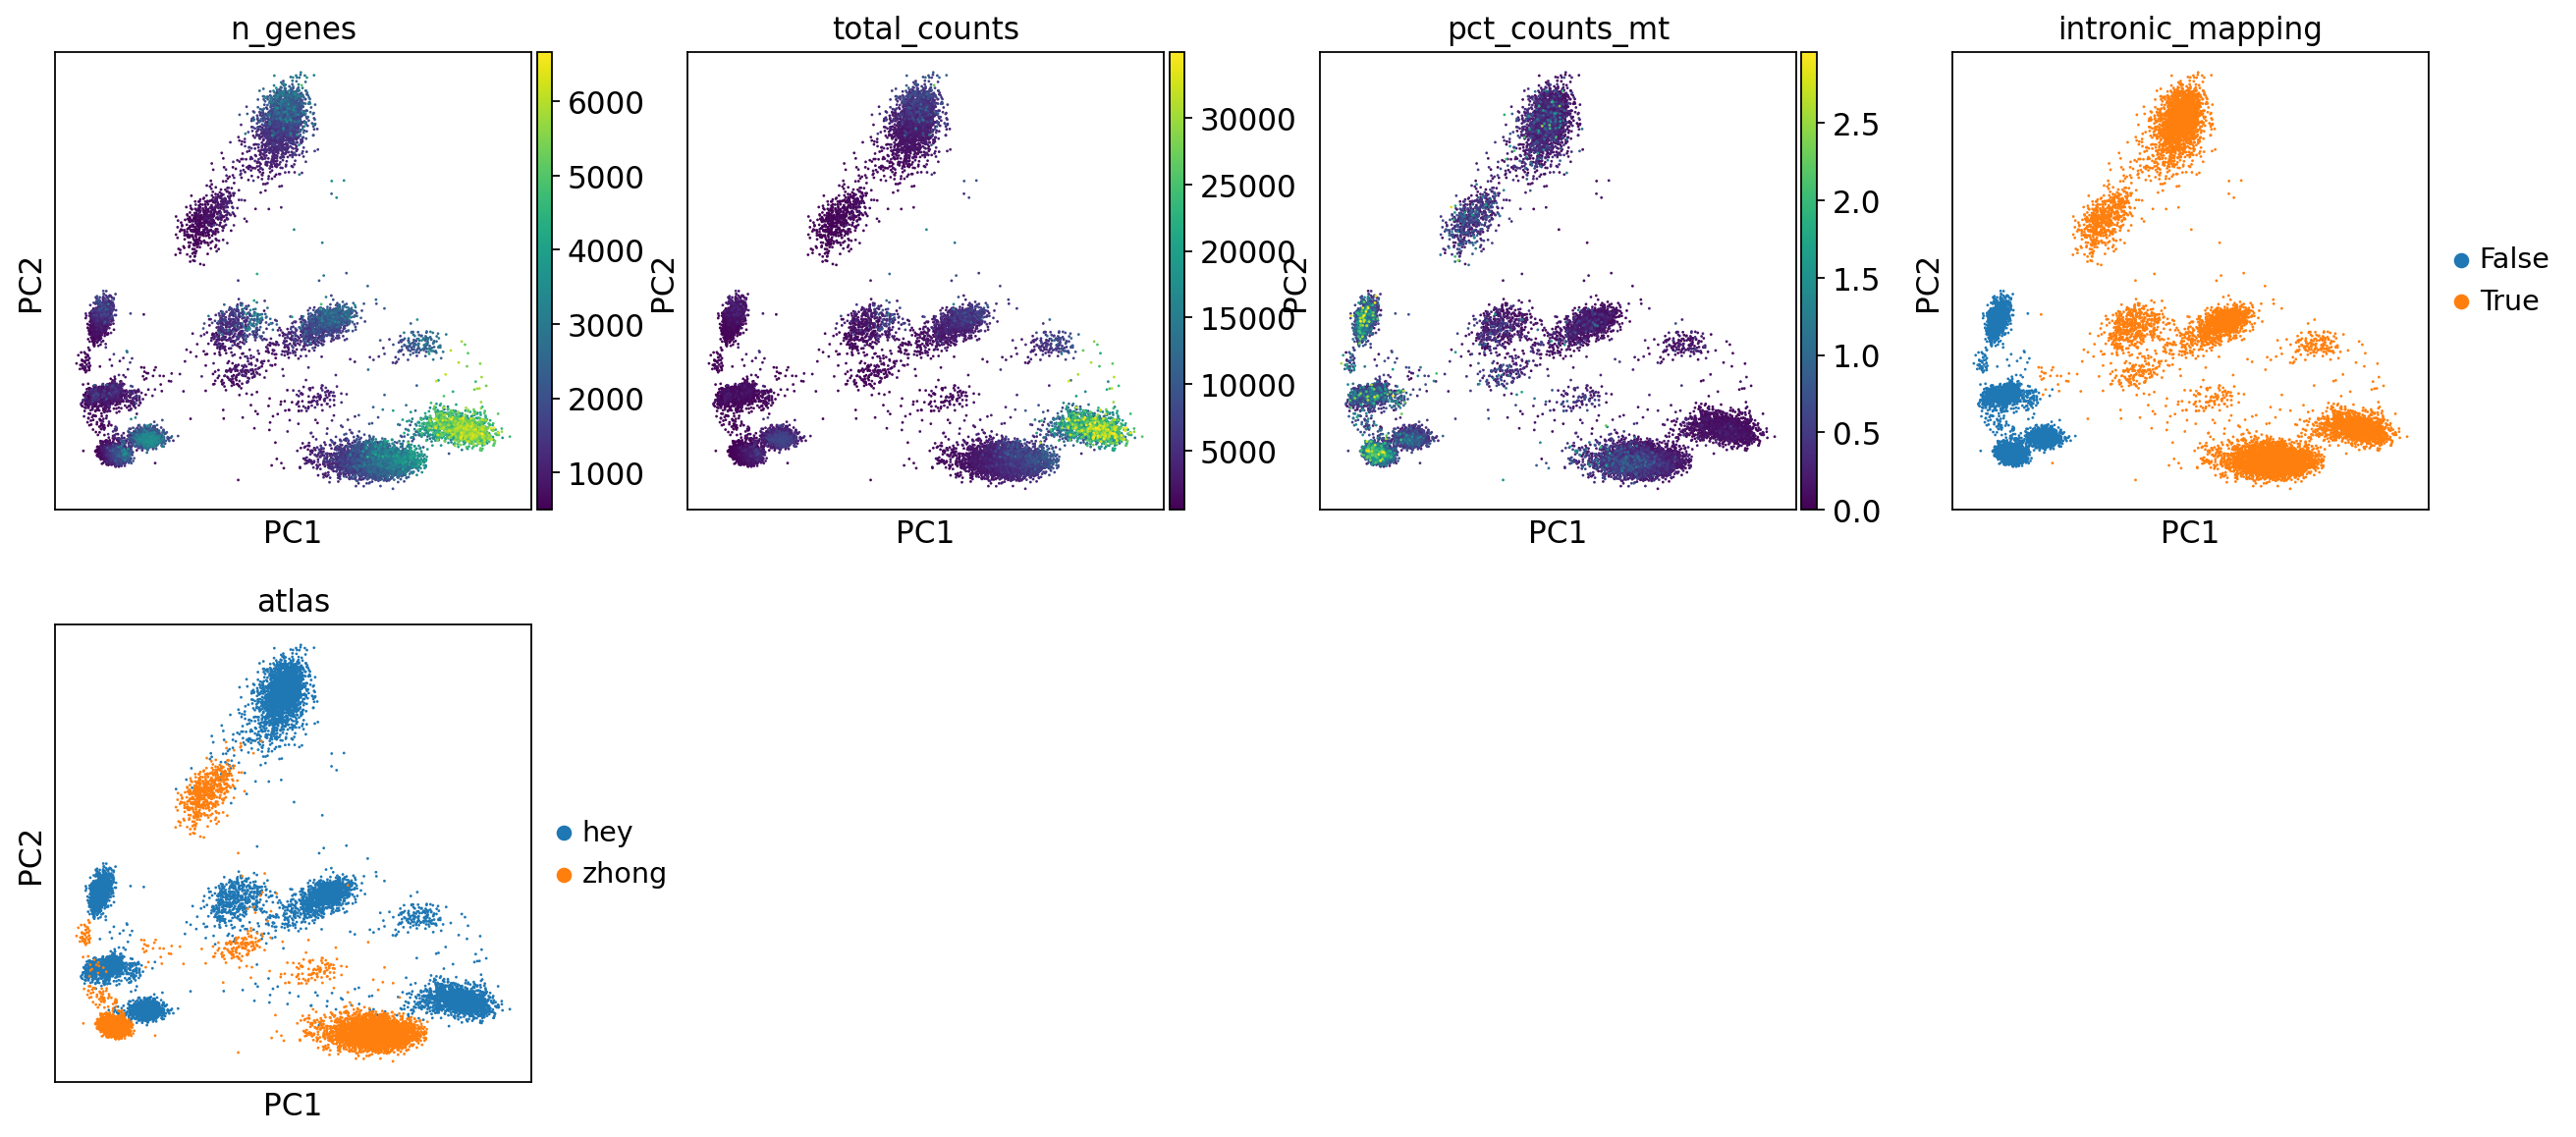

In [33]:
sc.pl.pca(adata_merge, color=['n_genes', 'total_counts', 'pct_counts_mt', 'intronic_mapping', 'atlas'], save = "_merge_pca_1.png")
#    sc.pl.pca(locals()[object_names_reg[i]], color=['n_genes', 'total_counts', 'pct_counts_mt'], save = "_"+object_names_reg[i]+"_intron_metrics_1.pdf")


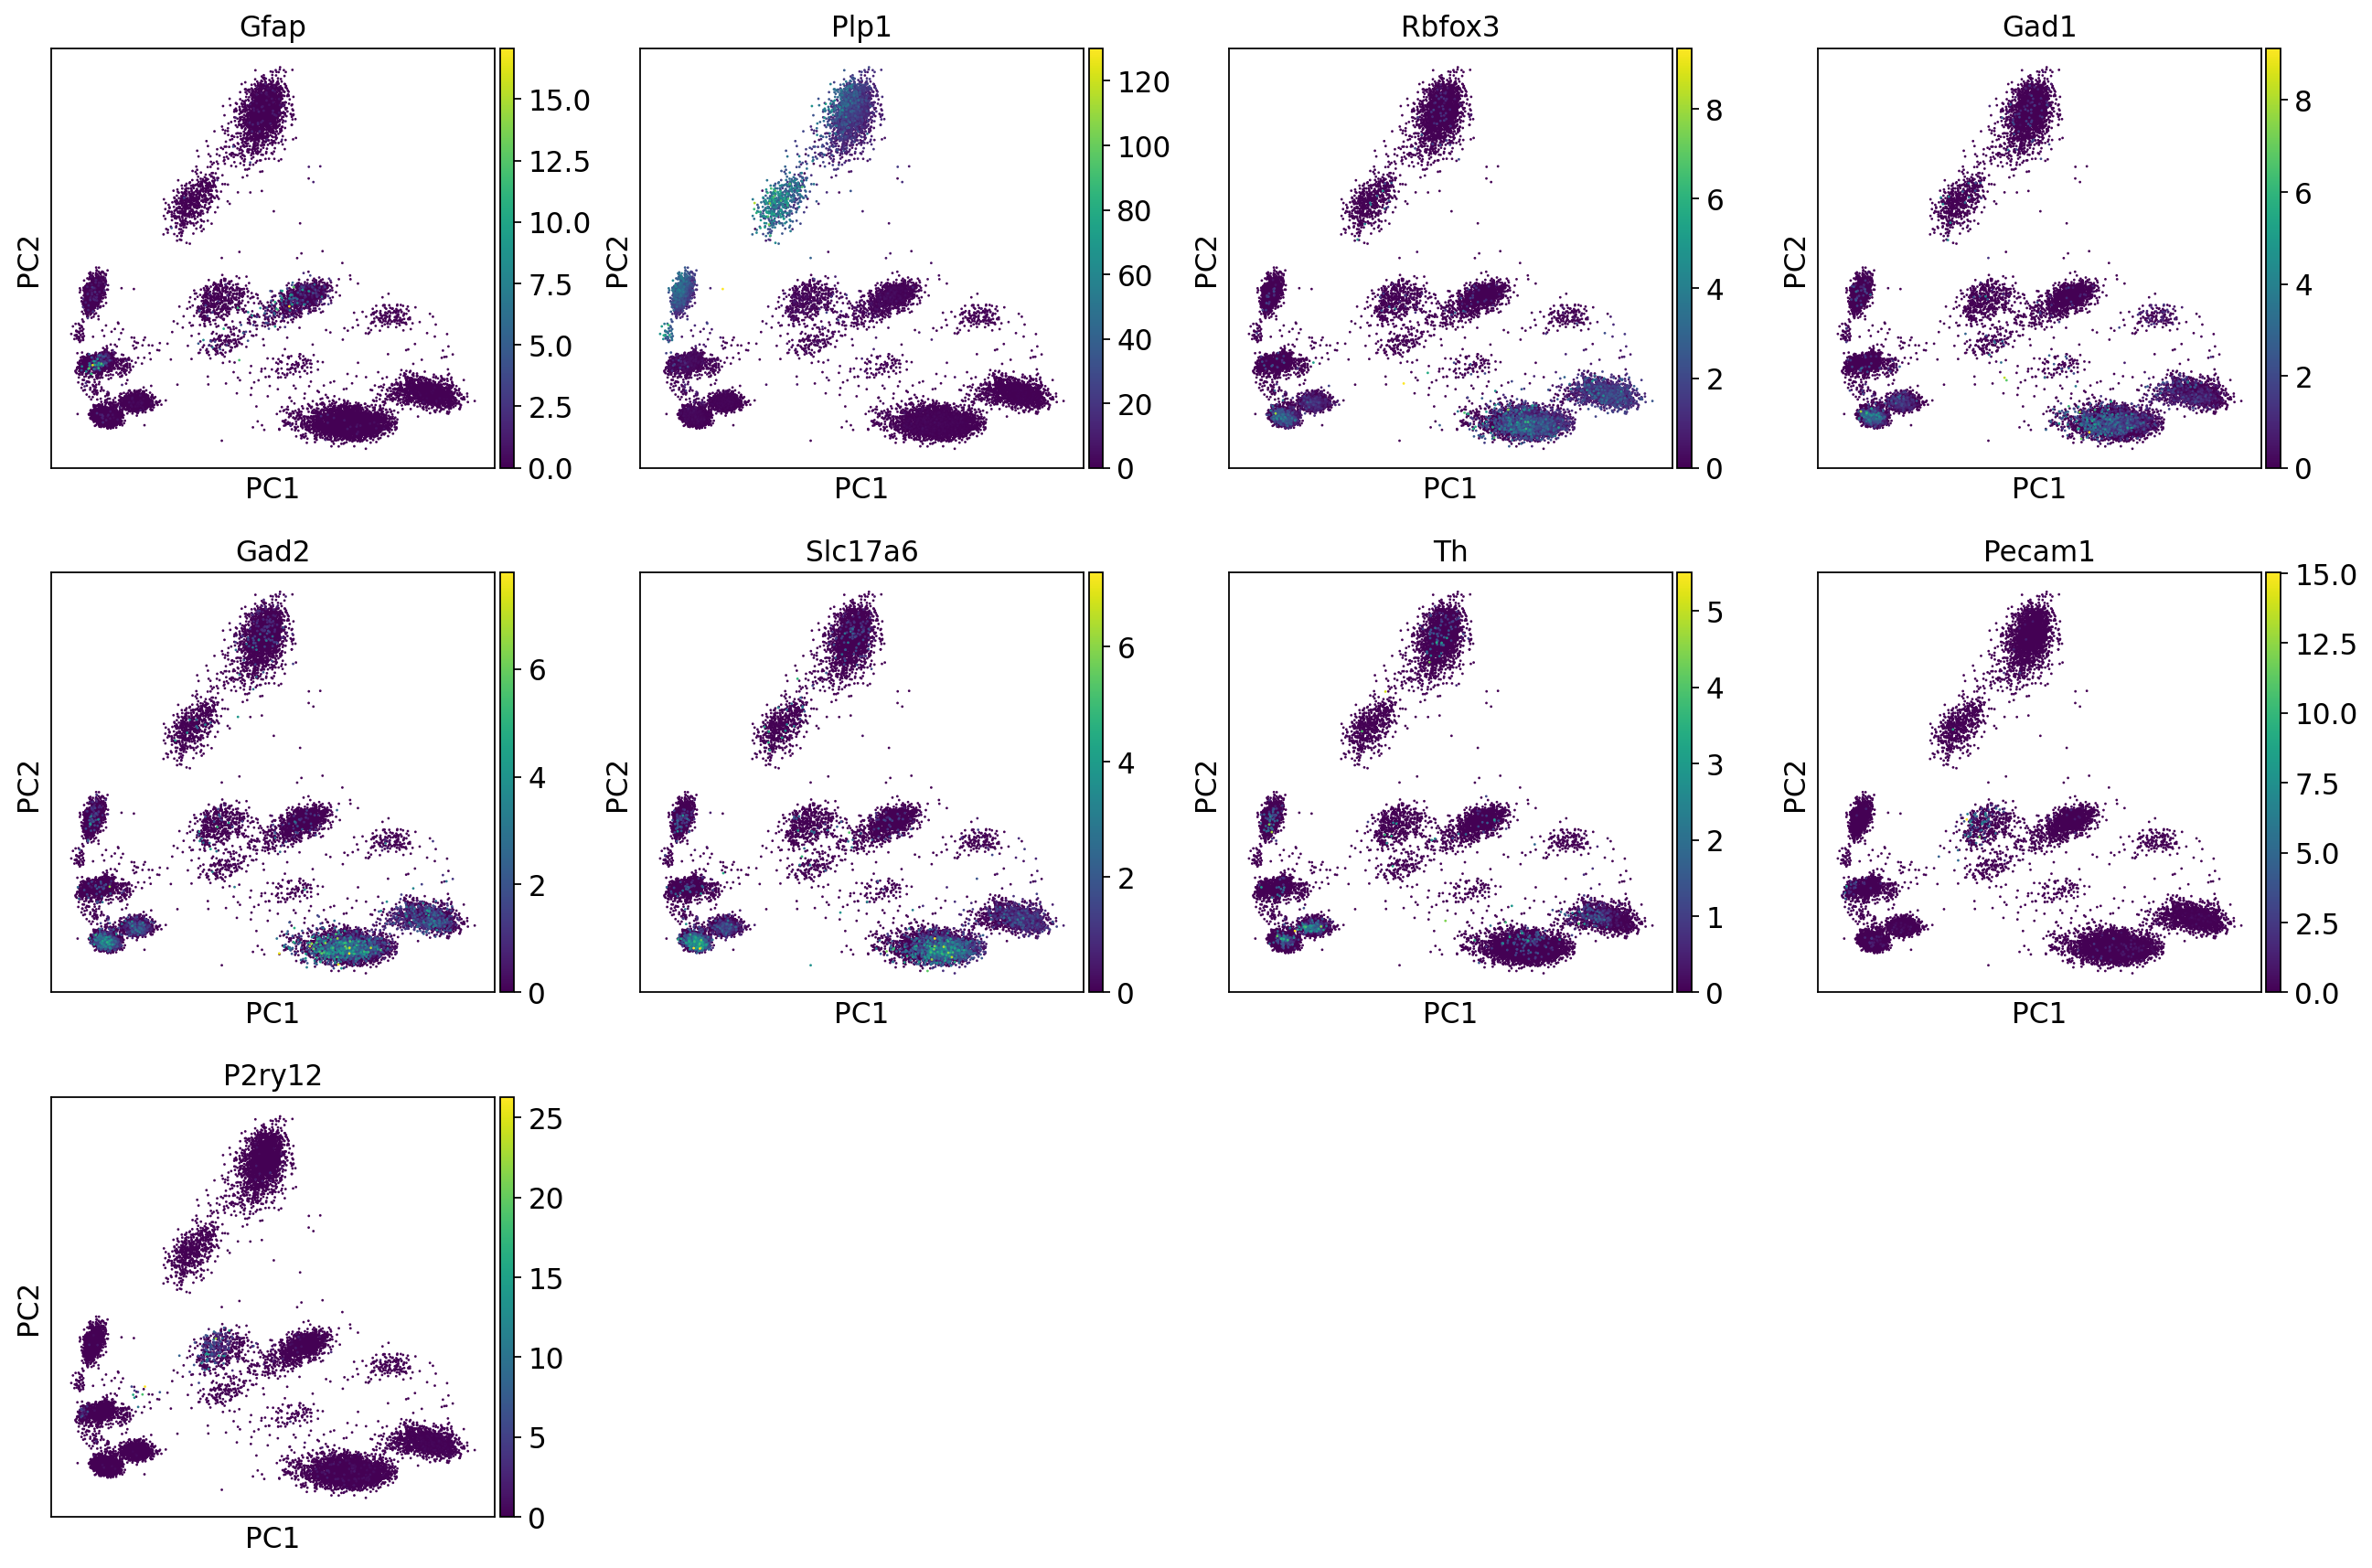

In [34]:
sc.pl.pca(adata_merge_rb, color=['Gfap', 'Plp1', 'Rbfox3','Gad1','Gad2','Slc17a6','Th','Pecam1','P2ry12' ])

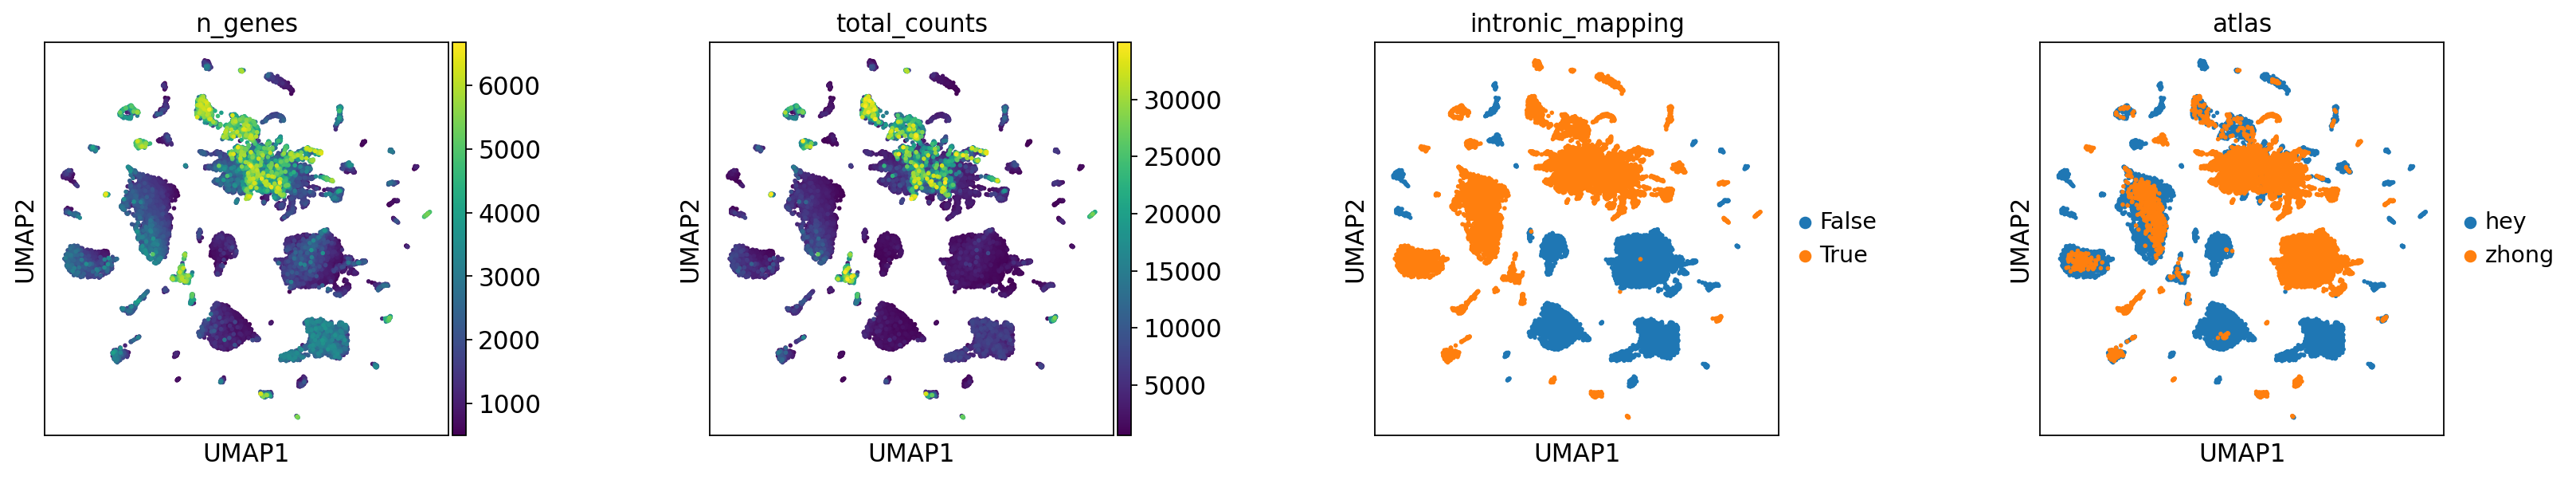

In [35]:
sc.pp.neighbors(adata_merge_rb, n_neighbors=nn, n_pcs=40,use_rep='X_pca_harmony')
sc.tl.umap(adata_merge_rb)
sc.pl.umap(adata_merge_rb, color=['n_genes', 'total_counts','intronic_mapping', 'atlas'], wspace=0.5, 
           use_raw=False, s=25,save = '_merge_batch_rb_0.png')

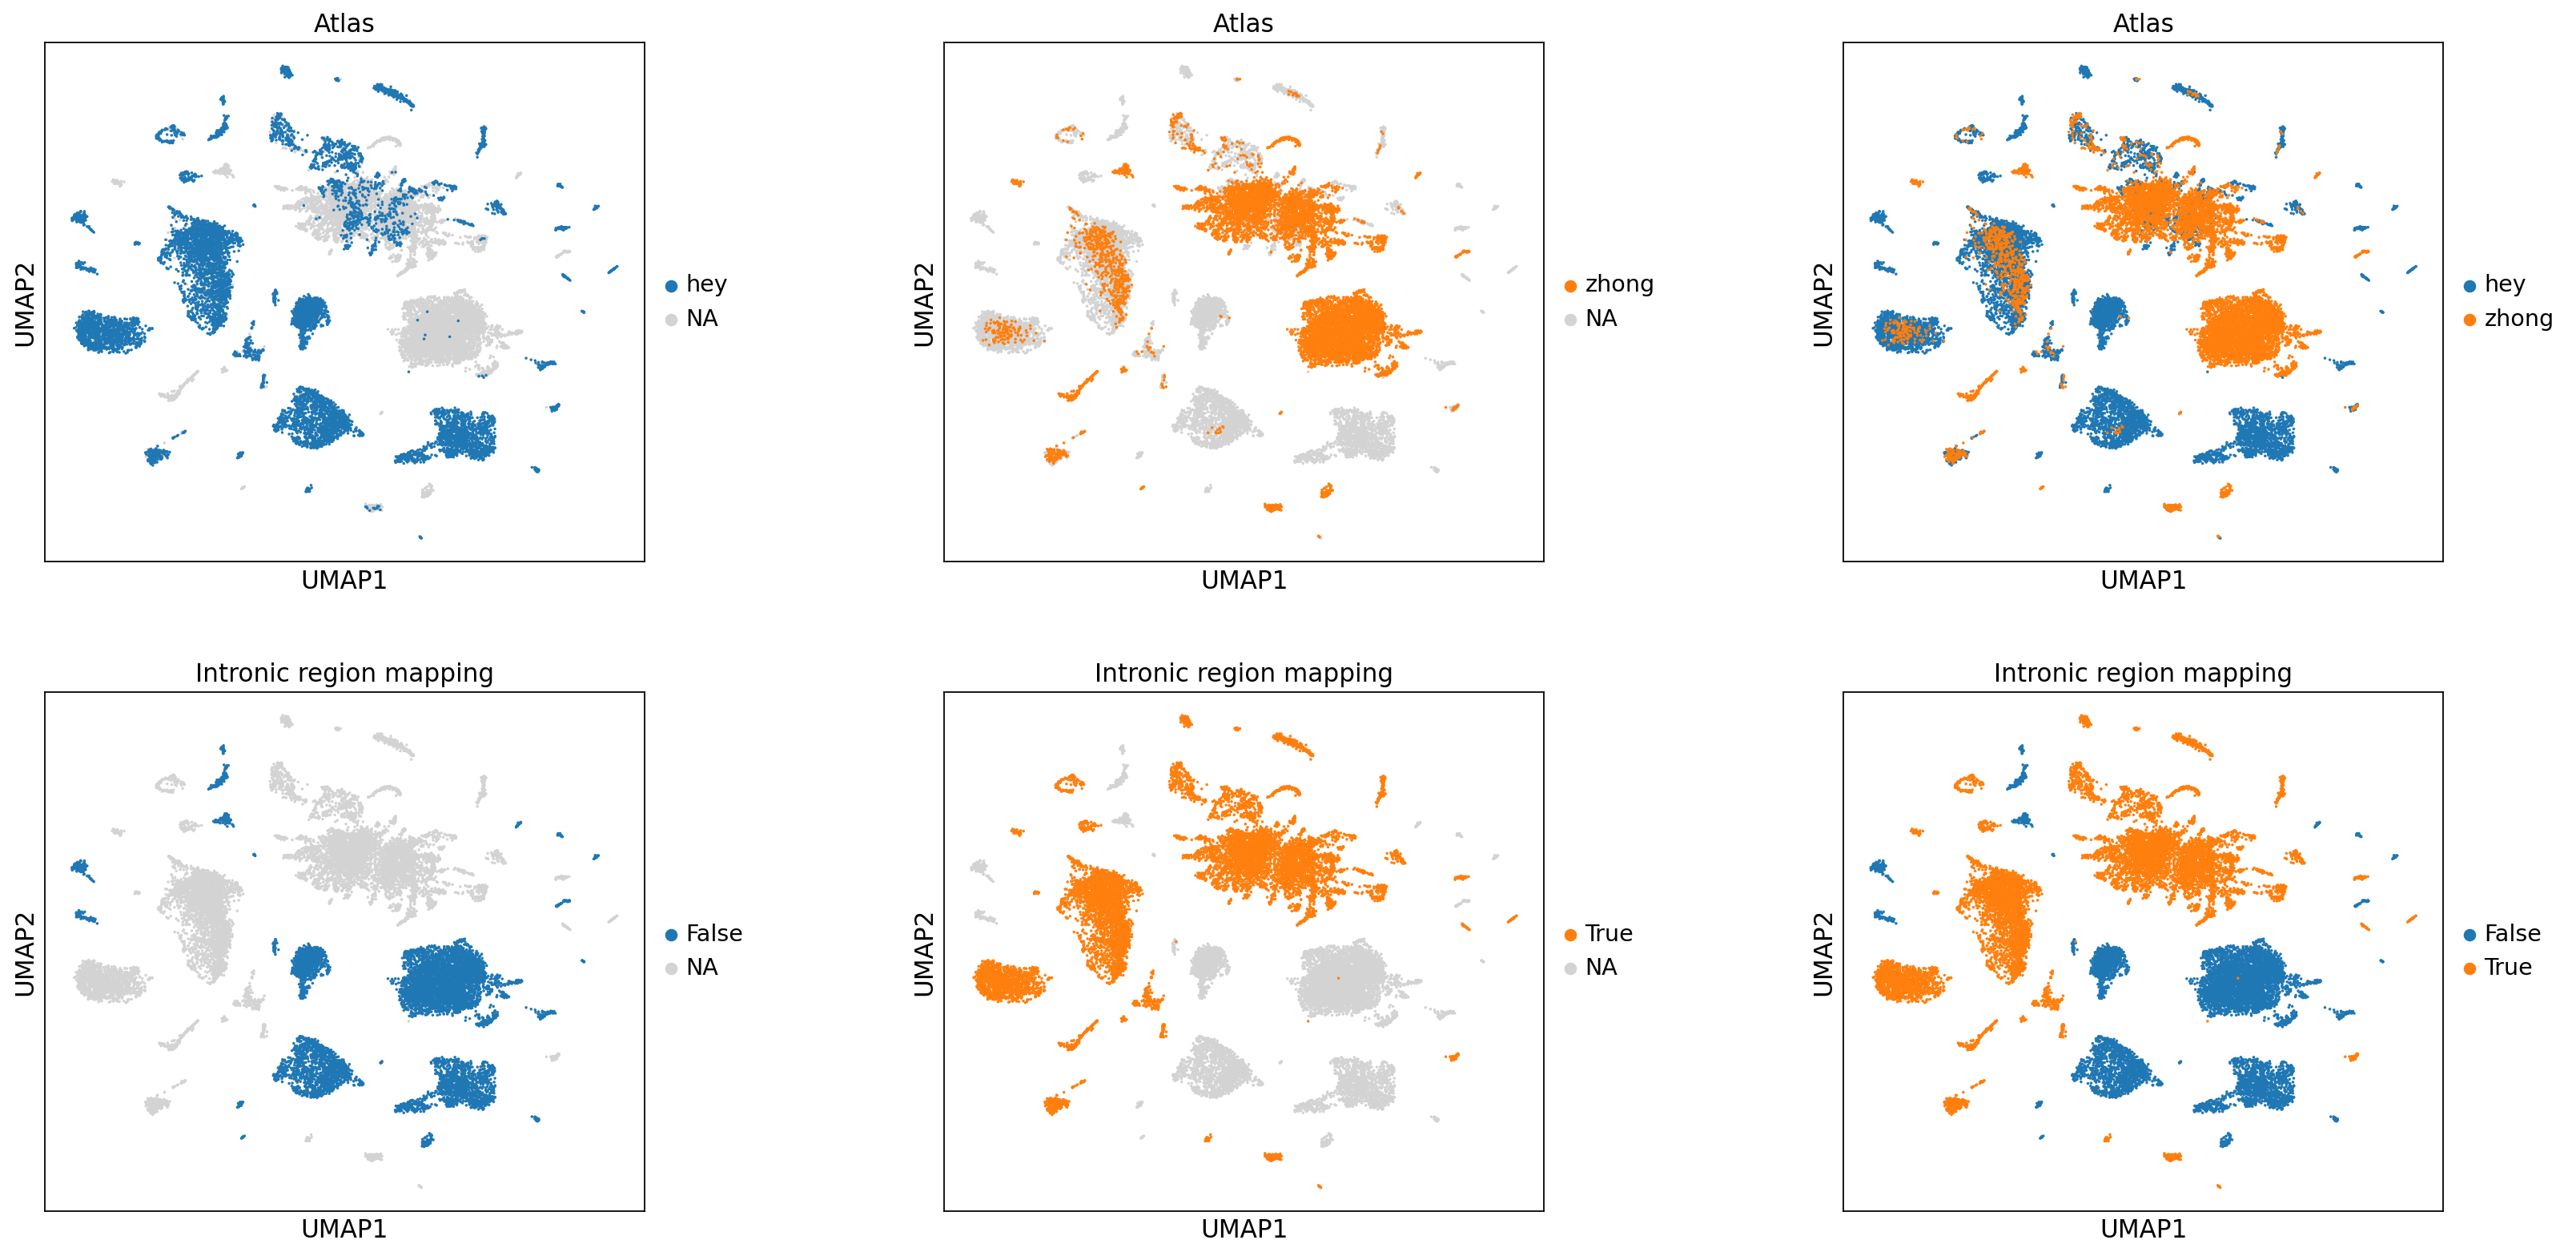

In [36]:
fig, axs = plt.subplots(2, 3, figsize = [24,12])
#axs[-1, -1].axis('off')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.25)
sc.pl.umap(adata_merge_rb, color='atlas', groups= 'hey', use_raw=False, s=10, ax= axs[0,0],show=False, title='Atlas')
sc.pl.umap(adata_merge_rb, color='atlas', groups= 'zhong', use_raw=False, s=10, ax= axs[0,1],show=False, title='Atlas')
sc.pl.umap(adata_merge_rb, color='atlas', use_raw=False, s=10, ax= axs[0,2],show=False, title='Atlas')
sc.pl.umap(adata_merge_rb, color='intronic_mapping', groups= 'False', use_raw=False, s=10, ax= axs[1,0],show=False, title='Intronic region mapping')
sc.pl.umap(adata_merge_rb, color='intronic_mapping', groups= 'True', use_raw=False, s=10, ax= axs[1,1],show=False, title='Intronic region mapping')
sc.pl.umap(adata_merge_rb, color='intronic_mapping', use_raw=False, s=10, ax= axs[1,2],show=False, title='Intronic region mapping')
fig.savefig('figures/merge/merge_batchcorrected_subplots.png',bbox_inches='tight')

In [37]:
atlas_intron = adata_merge_rb.obs['atlas'].astype(str)+ "_" + adata_merge_rb.obs['intronic_mapping'].astype(str)
adata_merge_rb.obs['atlas_intron'] = atlas_intron

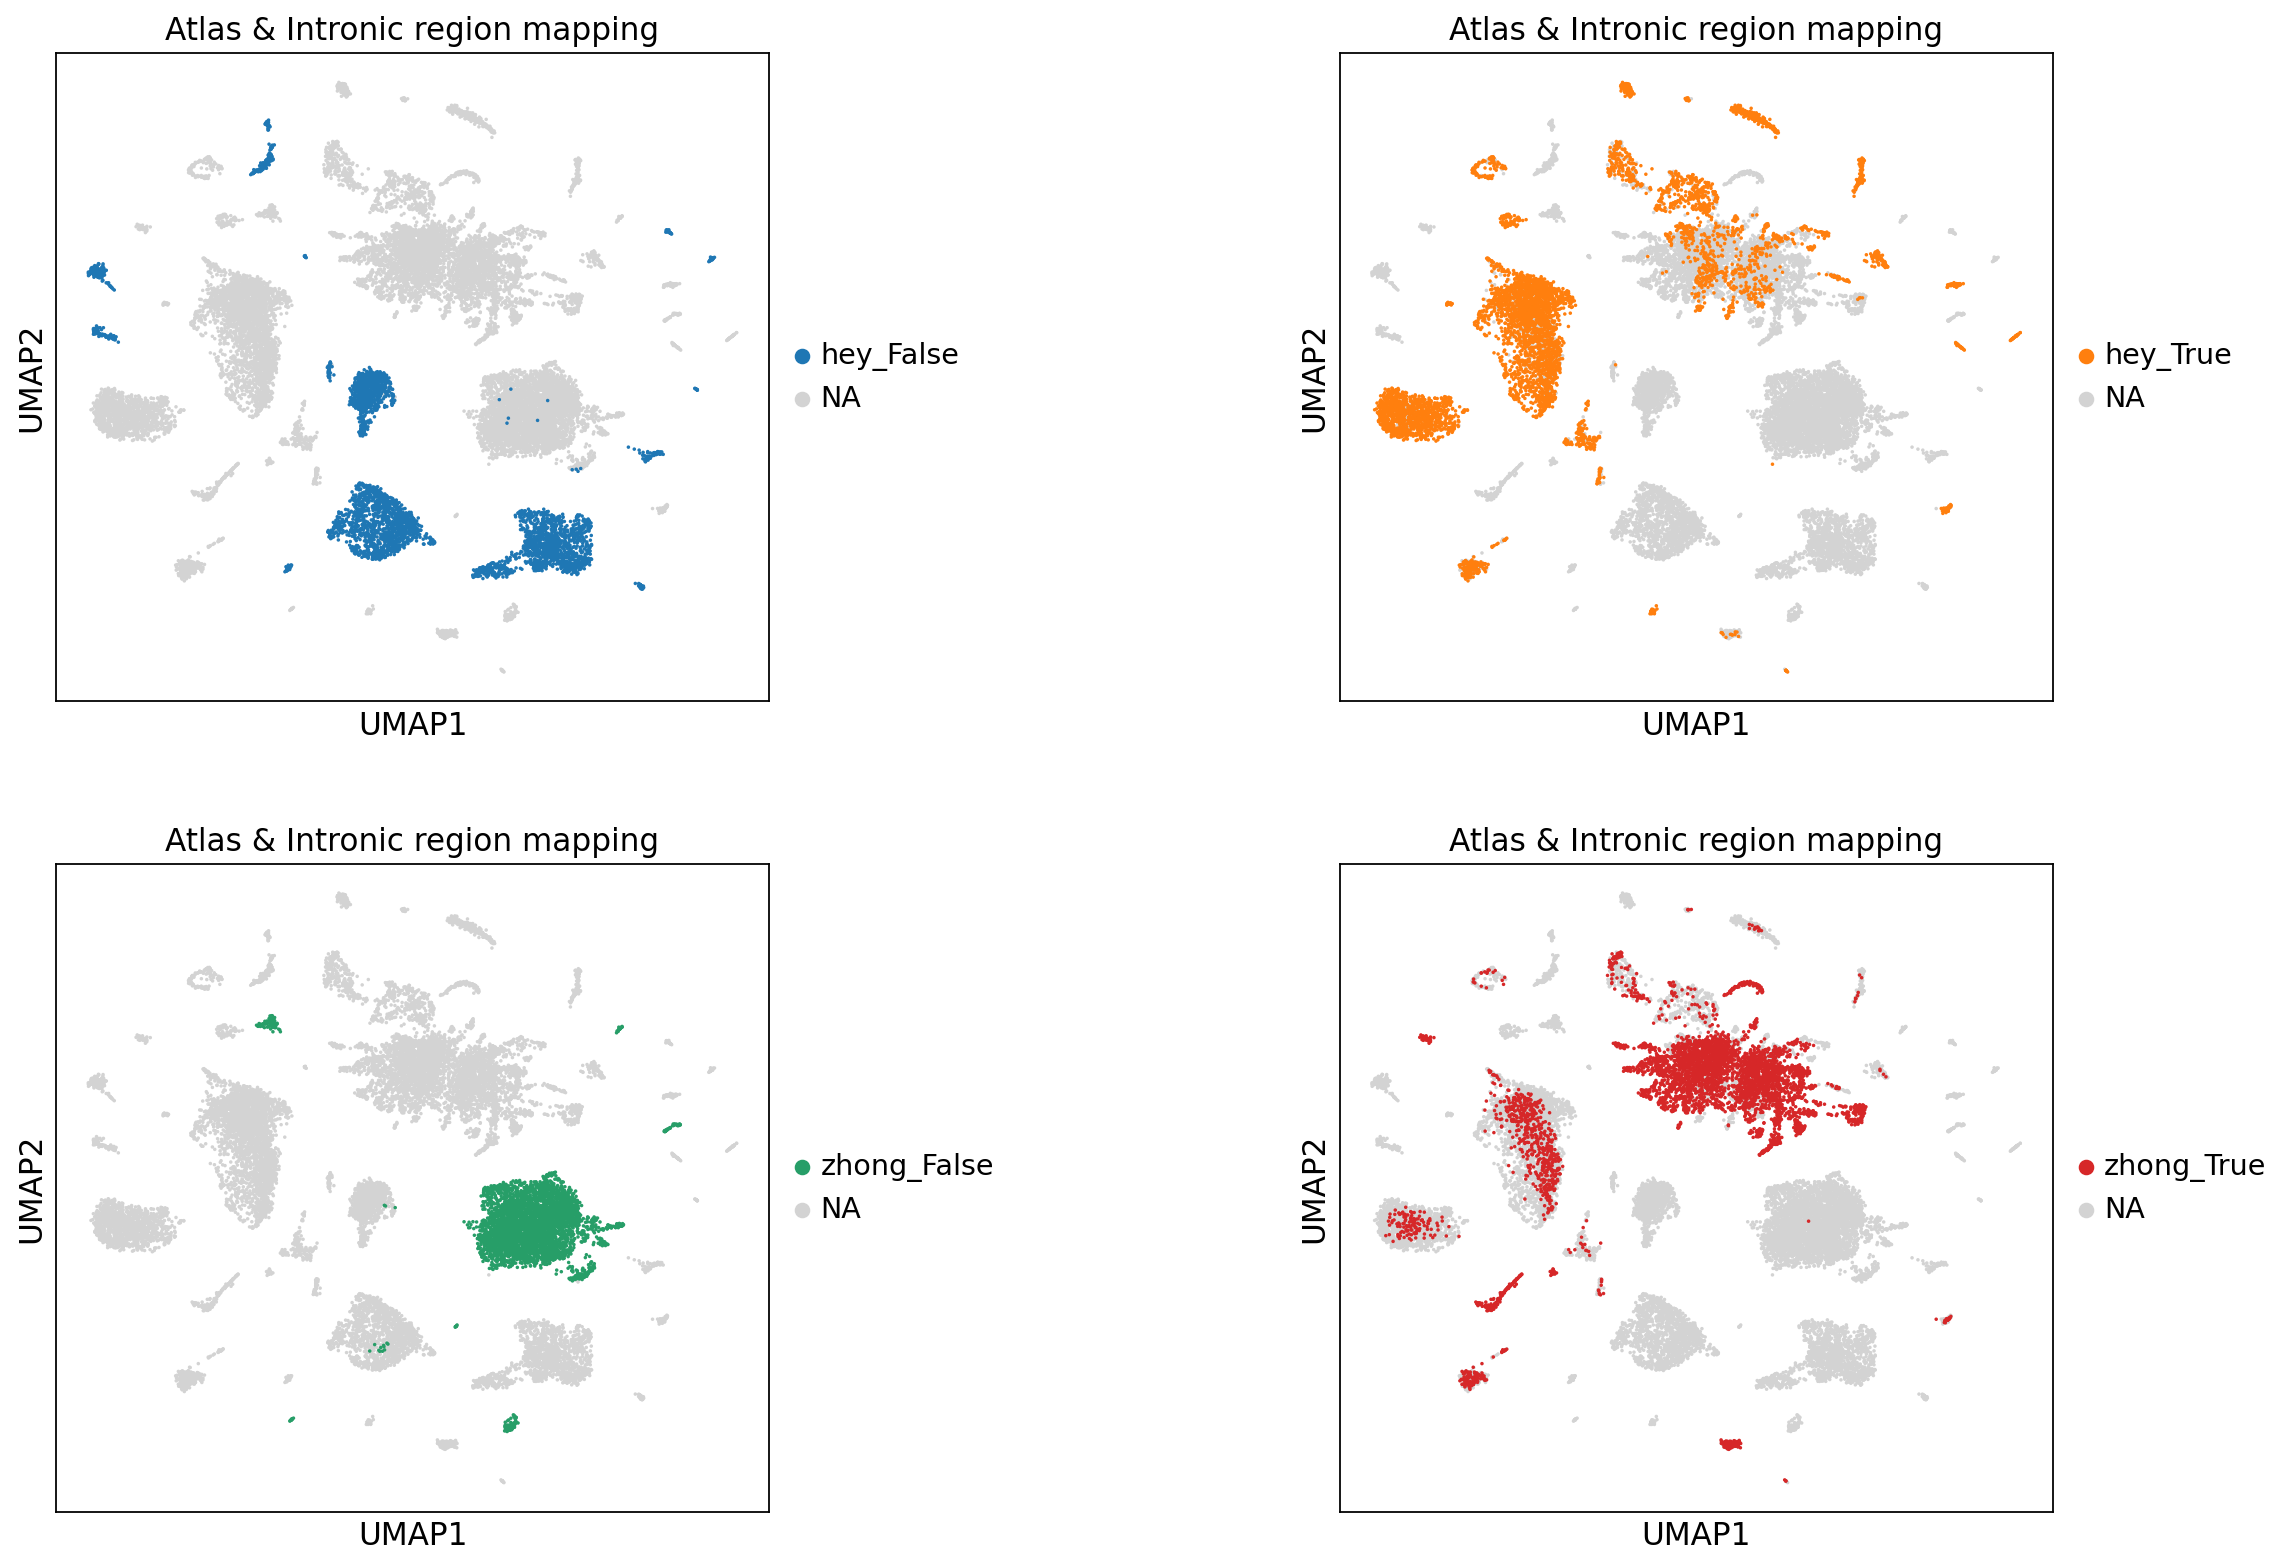

In [38]:
    fig, axs = plt.subplots(2, 2, figsize = [16,12])
#axs[-1, -1].axis('off')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=0.25)
sc.pl.umap(adata_merge_rb, color='atlas_intron', groups= 'hey_False', use_raw=False, s=10, ax= axs[0,0],show=False, title='Atlas & Intronic region mapping')
sc.pl.umap(adata_merge_rb, color='atlas_intron', groups= 'hey_True', use_raw=False, s=10, ax= axs[0,1],show=False, title='Atlas & Intronic region mapping')
sc.pl.umap(adata_merge_rb, color='atlas_intron', groups= 'zhong_False', use_raw=False, s=10, ax= axs[1,0],show=False, title='Atlas & Intronic region mapping')
sc.pl.umap(adata_merge_rb, color='atlas_intron', groups= 'zhong_True', use_raw=False, s=10, ax= axs[1,1],show=False, title='Atlas & Intronic region mapping')
#sc.pl.umap(adata_merge_rb, color='atlas_ref', use_raw=False, s=25, ax= axs[0,2],show=False)
fig.savefig('figures/merge/merge_batch_rb_specific_subplots.png',bbox_inches='tight')

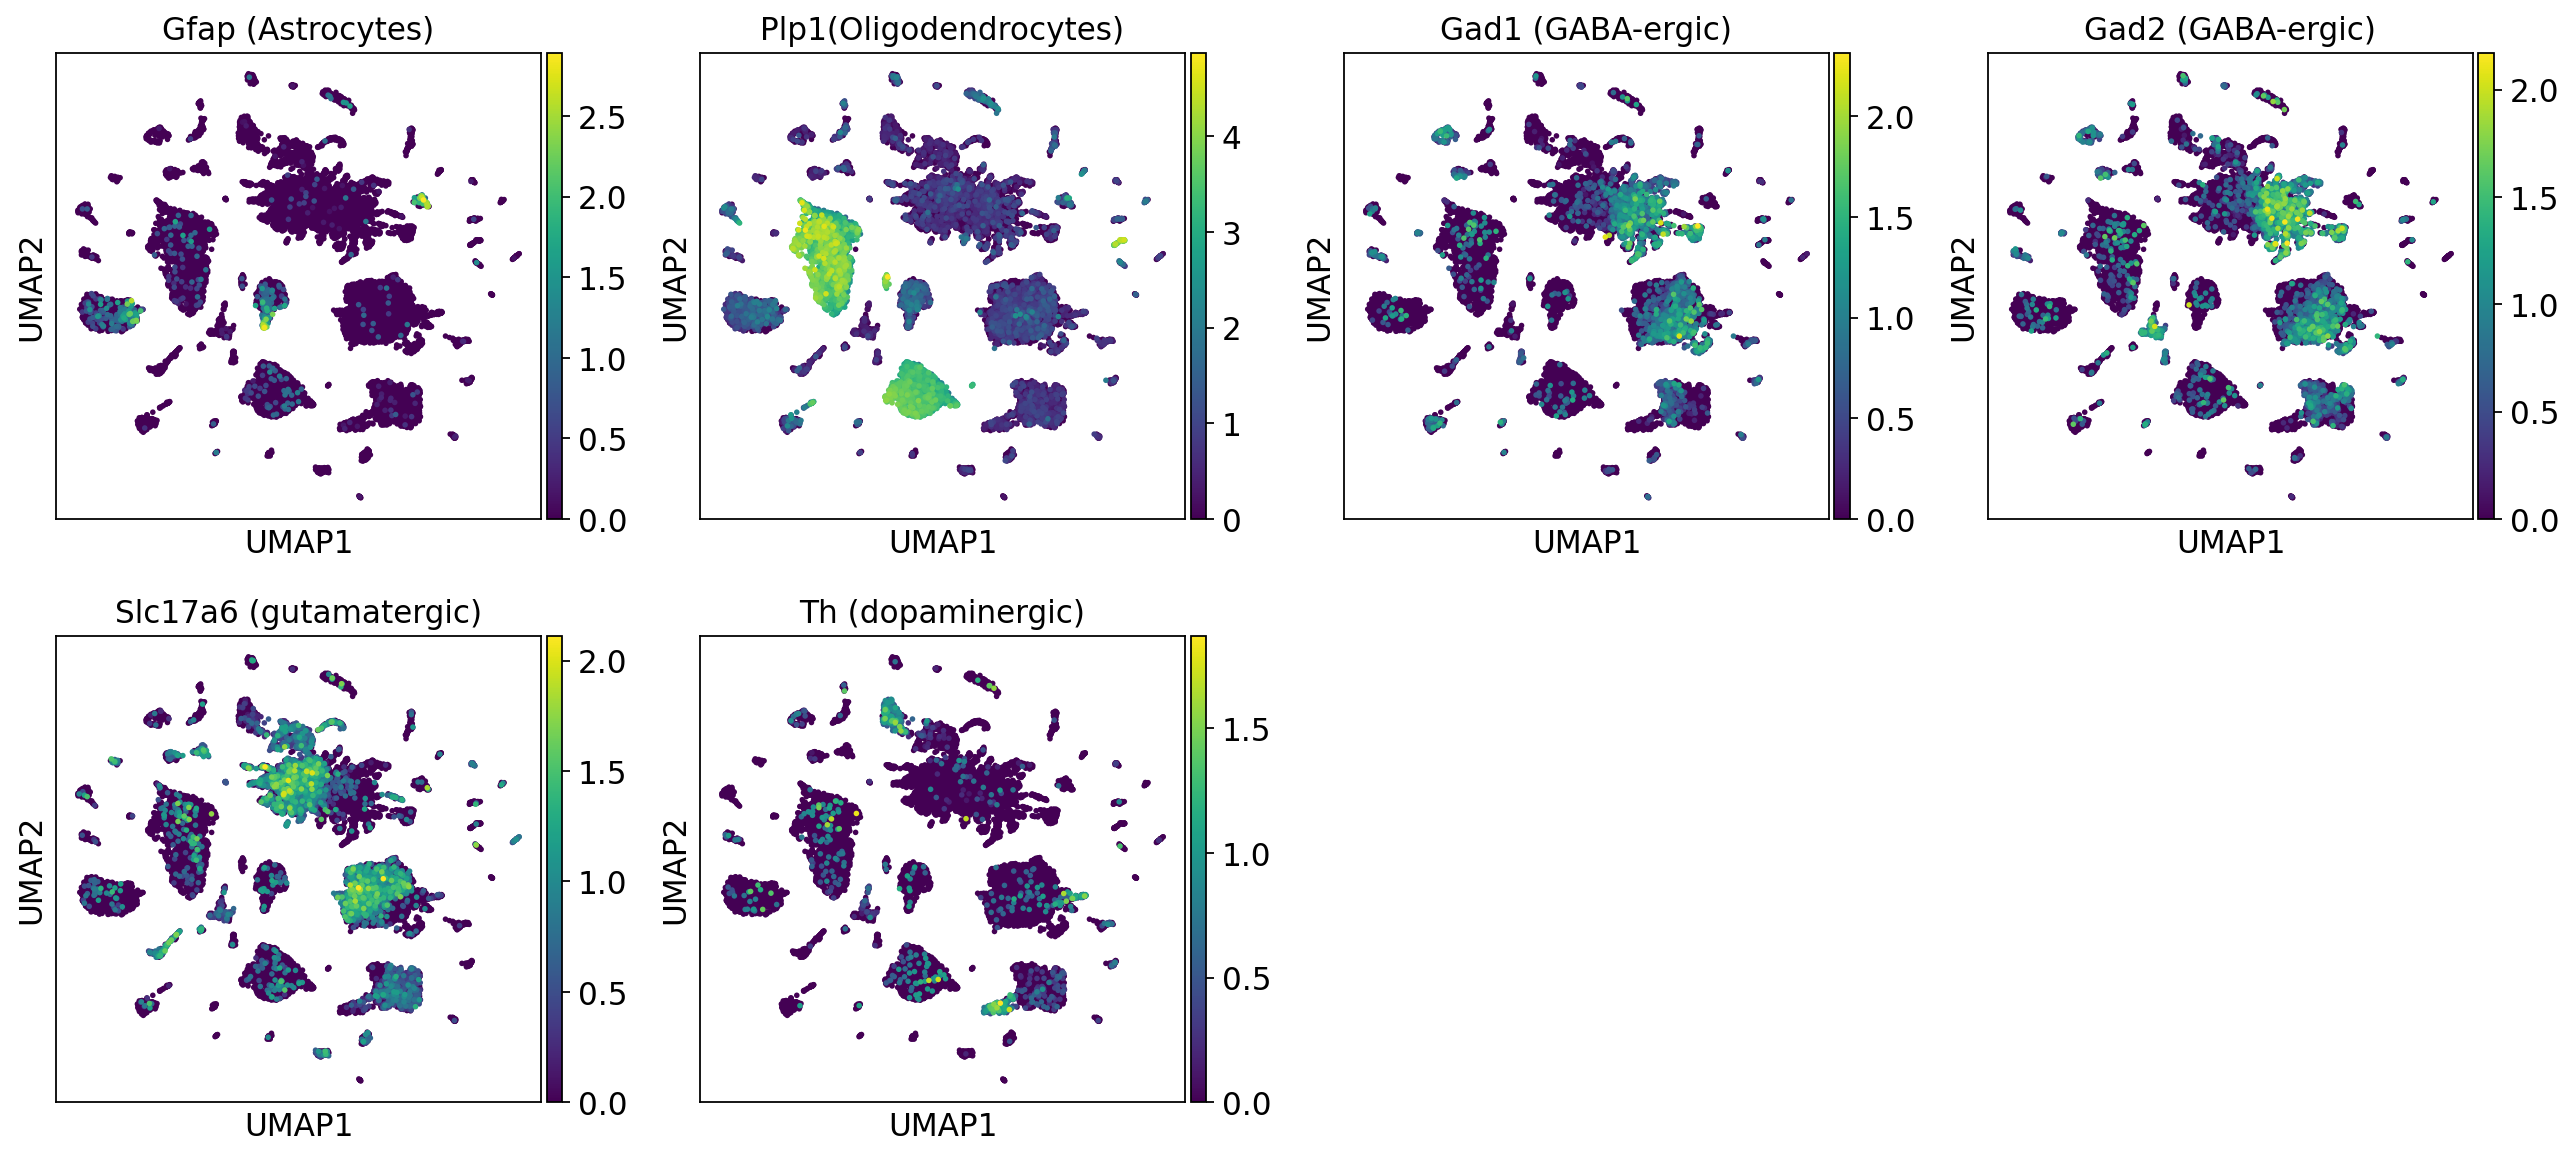

In [39]:
sc.pl.umap(adata_merge_rb, color=['Gfap', 'Plp1','Gad1','Gad2', 'Slc17a6','Th'],title=['Gfap (Astrocytes)', 'Plp1(Oligodendrocytes)', 'Gad1 (GABA-ergic)','Gad2 (GABA-ergic)', 'Slc17a6 (gutamatergic)', 'Th (dopaminergic)'], use_raw=False, s=25)
   #save = "_merge_umap_n"+str(nn)+"_2.pdf")